## Importing Libraries 

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [1]:
import pandas as pd
import numpy as np
import datetime
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Reading Datasets

In [2]:
trn = pd.read_csv("Train.csv")
tst = pd.read_csv("Test.csv")
weatherstation = pd.read_csv("AllStationsData_PHD.txt",sep='|')

In [3]:
h0401 = pd.read_csv("200401hourly.txt")
h0403 = pd.read_csv("200403hourly.txt")
h0405 = pd.read_csv("200405hourly.txt")
h0407 = pd.read_csv("200407hourly.txt")
h0409 = pd.read_csv("200409hourly.txt")
h0411 = pd.read_csv("200411hourly.txt")

h0503 = pd.read_csv("200503hourly.txt")
h0507 = pd.read_csv("200507hourly.txt")
h0509 = pd.read_csv("200509hourly.txt")
h0511 = pd.read_csv("200511hourly.txt")

In [4]:
p0401 = pd.read_csv("200401hpd.txt")
p0403 = pd.read_csv("200403hpd.txt")
p0405 = pd.read_csv("200405hpd.txt")
p0407 = pd.read_csv("200407hpd.txt")
p0409 = pd.read_csv("200409hpd.txt")
p0411 = pd.read_csv("200411hpd.txt")

p0503 = pd.read_csv("200503hpd.txt")
p0507 = pd.read_csv("200507hpd.txt")
p0509 = pd.read_csv("200509hpd.txt")
p0511 = pd.read_csv("200511hpd.txt")

## Merging the datasets to a single Dataframe

In [5]:
## merging train and test

trn.shape, tst.shape

((7861, 12), (6566, 11))

In [6]:
trn.head(2)

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,563,20/09/04 11:54
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,19/11/04 18:55


In [7]:
tst.head(2)

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance
0,DEN_XNA_62349,2005,9,12,1,1516,1756,100,DEN,XNA,616
1,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,EWR,278


In [8]:
print("train:",trn.Year.value_counts(), "\n\ntest:",tst.Year.value_counts())

train: 2004    7861
Name: Year, dtype: int64 

test: 2005    6566
Name: Year, dtype: int64


In [9]:
## Extracting the Actual arrival timestamp and Destination from train dataset.

actarr = pd.DataFrame(trn["ActualArrivalTimeStamp"], columns =['ActualArrivalTimeStamp'])
actarr["Destination"] = trn.Destination
trn.drop(['ActualArrivalTimeStamp'],axis = 1, inplace = True)

In [10]:
actarr.shape,actarr.head(10)

((7861, 2),
   ActualArrivalTimeStamp Destination
 0         20/09/04 11:54         CLE
 1         19/11/04 18:55         ATL
 2         04/05/04 19:02         LAS
 3         06/07/04 15:33         TPA
 4         23/09/04 09:46         ORD
 5         26/09/04 18:32         GRR
 6         05/05/04 15:17         STL
 7         15/09/04 07:58         SFO
 8         28/05/04 18:39         DFW
 9         11/09/04 12:23         PIT)

In [11]:
data = [trn,tst]
df = pd.concat(data)
df = df.reset_index(drop=True)

In [12]:
df[7859:7863]

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance
7859,SLC_GEG_25787,2004,1,4,7,1130,1214,104,SLC,GEG,546
7860,FLL_CLE_41967,2004,11,6,6,1325,1613,168,FLL,CLE,1062
7861,DEN_XNA_62349,2005,9,12,1,1516,1756,100,DEN,XNA,616
7862,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,EWR,278


In [13]:
df.shape

(14427, 11)

In [14]:
##                                           *** Weatherstation Data ***

## Removing invalid Timezones in weatherstation data.

weatherstation.head(2)

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,3011,TEX,0,0,0,37.57,-107.55,+7
1,3012,SKX,0,0,0,36.28,-105.40,+7


In [15]:
weatherstation.TimeZone.unique()

array(['+7', '+6', '+8', '+5', '+4', '+9', '+10', 'Yukon Standard', '-10',
       'Bering Standard', 'Alaska-Hawaii', 'Eastern Standard'],
      dtype=object)

In [16]:
weatherstation.rmtimezone = ['-10', 'Yukon Standard','Bering Standard','Alaska-Hawaii','Eastern Standard']
weatherstation = weatherstation[~weatherstation.TimeZone.isin(weatherstation.rmtimezone)]
weatherstation = weatherstation.reset_index(drop=True)
weatherstation.TimeZone.unique()

array(['+7', '+6', '+8', '+5', '+4', '+9', '+10'], dtype=object)

In [17]:
weatherstation.TimeZone = pd.to_numeric(weatherstation.TimeZone)
weatherstation.TimeZone =  pd.TimedeltaIndex(weatherstation.TimeZone, unit='h')
weatherstation.head()

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,3011,TEX,0,0,0,37.57,-107.55,0 days 07:00:00
1,3012,SKX,0,0,0,36.28,-105.40,0 days 07:00:00
2,3013,LAA,3683,3703,3675,38.04,-102.41,0 days 07:00:00
3,3014,4SL,0,6909,0,35.47,-107.14,0 days 07:00:00
4,3016,RIL,5503,5544,5506,39.32,-107.44,0 days 07:00:00


In [18]:
##   merging hourly weather data of every month to a single Dataframe.


hour4 = [h0401,h0403,h0405,h0407,h0409,h0411]
hour4 = pd.concat(hour4)

hour5 = [h0503,h0507,h0509,h0511]
hour5 = pd.concat(hour5)

In [19]:
hdf = [hour4,hour5]
hour = pd.concat(hdf)
hour = hour.reset_index(drop=True)

In [20]:
hour.shape

(11516906, 12)

In [21]:
hour.head(2)

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,3034,20040101,10,OVC095,10SM,30.0,7.0,38.0,0.0,000,0.0,30.10
1,3035,20040101,10,SCT110,10SM,43.0,18.0,37.0,0.0,000,0.0,30.07


In [22]:
hour.Time = hour.Time.astype(str).str.zfill(4)
hour["Time"] = pd.to_datetime(hour.YearMonthDay.astype(str) + ' ' +hour.Time.astype(str))
hour.head(2)

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,3034,20040101,2004-01-01 00:10:00,OVC095,10SM,30.0,7.0,38.0,0.0,000,0.0,30.10
1,3035,20040101,2004-01-01 00:10:00,SCT110,10SM,43.0,18.0,37.0,0.0,000,0.0,30.07


In [23]:
hour = hour.reset_index().merge(weatherstation, how='left',left_on = "WeatherStationID",right_on="WeatherStationID").set_index('index')
hour = hour.sort_index(axis = 0)

In [24]:
## converting Localtime to UTC time based on weatherstation Timezone

hour.Time = hour.Time - hour.TimeZone
hour['visibility'] = hour.Visibility.str.extract('([-]?[\d.]*)', expand=False).str.strip()

In [25]:
hour.drop(['YearMonthDay', 'AirportID', 'GroundHeight', 'StationHeight',
           'BarometerHeight', 'Latitude', 'Longitude', 'TimeZone','Visibility'],axis = 1,inplace = True)

In [26]:
hour.rename(columns = {'WeatherStationID':'ws_id','DewPointTemp':'DPT','RelativeHumidityPercent':'RHP','StationPressure':'preassure'}, inplace = True)

In [27]:
hour.head()

,ws_id,Time,SkyConditions,DBT,DPT,RHP,WindSpeed,WindDirection,WindGustValue,preassure,visibility
index,,,,,,,,,,,
0,3034,2003-12-31 17:10:00,OVC095,30.0,7.0,38.0,0.0,000,0.0,30.10,10
1,3035,2003-12-31 17:10:00,SCT110,43.0,18.0,37.0,0.0,000,0.0,30.07,10
2,3039,2003-12-31 17:10:00,OVC002,14.0,12.0,92.0,0.0,000,0.0,30.01,0.25
3,3040,2003-12-31 17:10:00,CLR,30.0,21.0,69.0,9.0,250,0.0,29.82,10
4,4128,2003-12-31 16:10:00,BKN001 BKN010 OVC024,NaN,NaN,NaN,0.0,000,0.0,29.80,4


In [28]:
## roundingoff the houry time Hour

hour['Time_ro'] = hour.Time
hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11516906 entries, 0 to 11516905
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ws_id          int64         
 1   Time           datetime64[ns]
 2   SkyConditions  object        
 3   DBT            float64       
 4   DPT            float64       
 5   RHP            float64       
 6   WindSpeed      object        
 7   WindDirection  object        
 8   WindGustValue  float64       
 9   preassure      float64       
 10  visibility     object        
 11  Time_ro        datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(1), object(4)
memory usage: 1.1+ GB


In [29]:

hour["Time_ro"] = hour["Time_ro"].round('60min')
##hour["Time_ro"] = np.array(hour.Time_ro, dtype='datetime64[h]')

hour.head(25)

,ws_id,Time,SkyConditions,DBT,DPT,RHP,WindSpeed,WindDirection,WindGustValue,preassure,visibility,Time_ro
index,,,,,,,,,,,,
0,3034,2003-12-31 17:10:00,OVC095,30.0,7.0,38.0,0.0,000,0.0,30.10,10,2003-12-31 17:00:00
1,3035,2003-12-31 17:10:00,SCT110,43.0,18.0,37.0,0.0,000,0.0,30.07,10,2003-12-31 17:00:00
2,3039,2003-12-31 17:10:00,OVC002,14.0,12.0,92.0,0.0,000,0.0,30.01,0.25,2003-12-31 17:00:00
3,3040,2003-12-31 17:10:00,CLR,30.0,21.0,69.0,9.0,250,0.0,29.82,10,2003-12-31 17:00:00
4,4128,2003-12-31 16:10:00,BKN001 BKN010 OVC024,NaN,NaN,NaN,0.0,000,0.0,29.80,4,2003-12-31 16:00:00
5,4876,2003-12-31 18:10:00,CLR,21.0,19.0,92.0,0.0,000,0.0,30.25,10,2003-12-31 18:00:00
6,4901,2003-12-31 18:10:00,CLR,28.0,18.0,66.0,4.0,110,0.0,29.96,10,2003-12-31 18:00:00
7,4924,2003-12-31 18:10:00,CLR,32.0,21.0,64.0,7.0,120,0.0,30.02,10,2003-12-31 18:00:00
8,4935,2003-12-31 18:10:00,CLR,30.0,18.0,61.0,0.0,000,0.0,29.91,10,2003-12-31 18:00:00


In [30]:
hour.tail()

,ws_id,Time,SkyConditions,DBT,DPT,RHP,WindSpeed,WindDirection,WindGustValue,preassure,visibility,Time_ro
index,,,,,,,,,,,,
11516901,64752,2005-11-30 04:59:00,CLR,54.0,45.0,72.0,8.0,300,0.0,29.94,10,2005-11-30 05:00:00
11516902,93167,2005-11-30 02:59:00,CLR,51.0,19.0,28.0,0.0,000,0.0,26.61,10,2005-11-30 03:00:00
11516903,93735,2005-11-30 04:59:00,FEW080,NaN,NaN,NaN,4.0,330,0.0,29.95,7,2005-11-30 05:00:00
11516904,94705,2005-11-30 04:59:00,BKN003 OVC015,NaN,NaN,NaN,6.0,300,0.0,NaN,3,2005-11-30 05:00:00
11516905,94950,2005-11-30 03:59:00,OVC070,19.0,14.0,81.0,0.0,000,0.0,28.58,10,2005-11-30 04:00:00


In [31]:
hour = hour.drop_duplicates(
  subset = ['ws_id', 'Time_ro'],
  keep = 'first').reset_index(drop = True)

In [32]:
hour.head()

,ws_id,Time,SkyConditions,DBT,DPT,RHP,WindSpeed,WindDirection,WindGustValue,preassure,visibility,Time_ro
0,3034,2003-12-31 17:10:00,OVC095,30.0,7.0,38.0,0.0,000,0.0,30.10,10,2003-12-31 17:00:00
1,3035,2003-12-31 17:10:00,SCT110,43.0,18.0,37.0,0.0,000,0.0,30.07,10,2003-12-31 17:00:00
2,3039,2003-12-31 17:10:00,OVC002,14.0,12.0,92.0,0.0,000,0.0,30.01,0.25,2003-12-31 17:00:00
3,3040,2003-12-31 17:10:00,CLR,30.0,21.0,69.0,9.0,250,0.0,29.82,10,2003-12-31 17:00:00
4,4128,2003-12-31 16:10:00,BKN001 BKN010 OVC024,NaN,NaN,NaN,0.0,000,0.0,29.80,4,2003-12-31 16:00:00


In [33]:
## merging hourly precipitation data to a single Dataframe.

ppt4 = [p0401,p0403,p0405,p0407,p0409,p0411]
ppt4 = pd.concat(ppt4)

ppt5 = [p0503,p0507,p0509,p0511]
ppt5 = pd.concat(ppt5)

In [34]:
pdf = [ppt4,ppt5]
ppt = pd.concat(pdf)
ppt = ppt.reset_index(drop=True)

In [35]:
ppt.shape

(12107407, 4)

In [36]:
ppt.tail(4)

,WeatherStationID,YearMonthDay,Time,HourlyPrecip
12107403,40504,20051130,2358,0.0
12107404,40309,20051130,2359,0.0
12107405,93167,20051130,2359,0.0
12107406,94950,20051130,2359,0.0


In [37]:
ppt.Time = ppt.Time.astype(str).str.zfill(4)
ppt["Time"] = pd.to_datetime(ppt.YearMonthDay.astype(str) + ' ' +ppt.Time.astype(str))
ppt.head(2)

,WeatherStationID,YearMonthDay,Time,HourlyPrecip
0,3034,20040101,2004-01-01 00:10:00,0.0
1,3035,20040101,2004-01-01 00:10:00,0.0


In [38]:
ppt = ppt.reset_index().merge(weatherstation, how='left',left_on = "WeatherStationID",right_on="WeatherStationID").set_index('index')
ppt = ppt.sort_index(axis = 0)

In [39]:
## converting Localtime to UTC time based on weatherstation Timezone

ppt.Time = ppt.Time - ppt.TimeZone

In [40]:
ppt.head(2)

,WeatherStationID,YearMonthDay,Time,HourlyPrecip,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
index,,,,,,,,,,,
0,3034,20040101,2003-12-31 17:10:00,0.0,AEG,0.0,0.0,0.0,35.09,-106.48,0 days 07:00:00
1,3035,20040101,2003-12-31 17:10:00,0.0,ATS,0.0,0.0,0.0,32.51,-104.28,0 days 07:00:00


In [41]:
ppt.drop(['YearMonthDay', 'AirportID', 'GroundHeight', 'StationHeight',
           'BarometerHeight', 'Latitude', 'Longitude', 'TimeZone'],axis = 1,inplace = True)

In [42]:
ppt.tail(2)

,WeatherStationID,Time,HourlyPrecip
index,,,
12107405,93167,2005-11-30 16:59:00,0.0
12107406,94950,2005-11-30 17:59:00,0.0


In [43]:
## roundingoff the houry time Hour

ppt['Time_roundoff'] = ppt.Time

In [44]:
ppt["Time_roundoff"] = ppt["Time_roundoff"].round('60min')

In [45]:
ppt = ppt.drop_duplicates(
  subset = ['WeatherStationID', 'Time_roundoff'],
  keep = 'first').reset_index(drop = True)

ppt.head()

,WeatherStationID,Time,HourlyPrecip,Time_roundoff
0,3034,2003-12-31 17:10:00,0.0,2003-12-31 17:00:00
1,3035,2003-12-31 17:10:00,0.0,2003-12-31 17:00:00
2,3039,2003-12-31 17:10:00,0.0,2003-12-31 17:00:00
3,3040,2003-12-31 17:10:00,0.0,2003-12-31 17:00:00
4,4128,2003-12-31 16:10:00,0.0,2003-12-31 16:00:00


## Merging ppt with hour data based on Weatherstation ID and Roundoff Time

In [46]:
hour = hour.drop_duplicates(
  subset = ['ws_id', 'Time_ro'],
  keep = 'first').reset_index(drop = True)

In [47]:
hour = hour.reset_index().merge(ppt, how='left', left_on = ["ws_id","Time_ro"] ,right_on = ["WeatherStationID","Time_roundoff"]).set_index('index')
hour = hour.sort_index(axis = 0)

In [48]:
hour.head()

,ws_id,Time_x,SkyConditions,DBT,DPT,RHP,WindSpeed,WindDirection,WindGustValue,preassure,visibility,Time_ro,WeatherStationID,Time_y,HourlyPrecip,Time_roundoff
index,,,,,,,,,,,,,,,,
0,3034,2003-12-31 17:10:00,OVC095,30.0,7.0,38.0,0.0,000,0.0,30.10,10,2003-12-31 17:00:00,3034.0,2003-12-31 17:10:00,0.0,2003-12-31 17:00:00
1,3035,2003-12-31 17:10:00,SCT110,43.0,18.0,37.0,0.0,000,0.0,30.07,10,2003-12-31 17:00:00,3035.0,2003-12-31 17:10:00,0.0,2003-12-31 17:00:00
2,3039,2003-12-31 17:10:00,OVC002,14.0,12.0,92.0,0.0,000,0.0,30.01,0.25,2003-12-31 17:00:00,3039.0,2003-12-31 17:10:00,0.0,2003-12-31 17:00:00
3,3040,2003-12-31 17:10:00,CLR,30.0,21.0,69.0,9.0,250,0.0,29.82,10,2003-12-31 17:00:00,3040.0,2003-12-31 17:10:00,0.0,2003-12-31 17:00:00
4,4128,2003-12-31 16:10:00,BKN001 BKN010 OVC024,NaN,NaN,NaN,0.0,000,0.0,29.80,4,2003-12-31 16:00:00,4128.0,2003-12-31 16:10:00,0.0,2003-12-31 16:00:00


In [49]:
hour.drop(['Time_y','WeatherStationID','Time_roundoff'],axis = 1,inplace = True)
hour.rename(columns = {'Time_x':'time'},inplace = True)

In [50]:
hour = hour.drop_duplicates(
  subset = ['ws_id', 'Time_ro'],
  keep = 'first').reset_index(drop = True)

In [51]:
hour.shape

(9023030, 13)

In [52]:
hour.head()

,ws_id,time,SkyConditions,DBT,DPT,RHP,WindSpeed,WindDirection,WindGustValue,preassure,visibility,Time_ro,HourlyPrecip
0,3034,2003-12-31 17:10:00,OVC095,30.0,7.0,38.0,0.0,000,0.0,30.10,10,2003-12-31 17:00:00,0.0
1,3035,2003-12-31 17:10:00,SCT110,43.0,18.0,37.0,0.0,000,0.0,30.07,10,2003-12-31 17:00:00,0.0
2,3039,2003-12-31 17:10:00,OVC002,14.0,12.0,92.0,0.0,000,0.0,30.01,0.25,2003-12-31 17:00:00,0.0
3,3040,2003-12-31 17:10:00,CLR,30.0,21.0,69.0,9.0,250,0.0,29.82,10,2003-12-31 17:00:00,0.0
4,4128,2003-12-31 16:10:00,BKN001 BKN010 OVC024,NaN,NaN,NaN,0.0,000,0.0,29.80,4,2003-12-31 16:00:00,0.0


### Converting Departure and Arrival local time to UTC time

In [53]:
df.ScheduledDepTime = df.ScheduledDepTime.astype(str).str.zfill(4)
df.ScheduledArrTime = df.ScheduledArrTime.astype(str).str.zfill(4)
df.DayofMonth = df.DayofMonth.astype(str).str.zfill(2)
df.Month = df.Month.astype(str).str.zfill(2)
df.Year = df.Year.astype(str).str.zfill(4)

In [54]:
df["date"] = df.Year.astype(str)+df.Month.astype(str)+df.DayofMonth.astype(str)
df["ScheduledDepTime"] = pd.to_datetime(df.date.astype(str) + ' ' +df.ScheduledDepTime.astype(str))
df["ScheduledArrTime"] = pd.to_datetime(df.date.astype(str) + ' ' +df.ScheduledArrTime.astype(str))
df = df.drop(['Month', 'DayofMonth','date'],axis = 1)

In [55]:
df.head()

,FlightNumber,Year,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance
0,BOS_CLE_29089,2004,1,2004-09-20 10:00:00,2004-09-20 11:54:00,114,BOS,CLE,563
1,CLE_ATL_44346,2004,5,2004-11-19 14:40:00,2004-11-19 16:34:00,114,CLE,ATL,554
2,SNA_LAS_44378,2004,2,2004-05-04 18:00:00,2004-05-04 19:02:00,62,SNA,LAS,226
3,CLT_TPA_51502,2004,2,2004-07-06 14:00:00,2004-07-06 15:33:00,93,CLT,TPA,508
4,MSP_ORD_44884,2004,4,2004-09-23 08:30:00,2004-09-23 09:46:00,76,MSP,ORD,334


In [56]:
## ScheduledDepTime to ------> UTC dep time

a=0
for i in df.Origin:
    b=0
    for j in weatherstation.AirportID:
        if (i==j): 
            df.ScheduledDepTime[a] = df.ScheduledDepTime[a] - weatherstation.TimeZone[b]
        b=b+1               
    a=a+1
df.rename(columns = {'ScheduledDepTime':'utc_dep'}, inplace = True)

In [57]:
## ScheduledArrTime to -----> UTC arrival time

a=0
for i in df.Destination:
    b=0
    for j in weatherstation.AirportID:
        if (i==j): 
            df.ScheduledArrTime[a] = df.ScheduledArrTime[a] - weatherstation.TimeZone[b]
        b=b+1               
    a=a+1
df.rename(columns = {'ScheduledArrTime':'utc_arr'}, inplace = True)


In [58]:
df.utc_arr = pd.to_datetime(df.utc_arr)

In [59]:
df.head()

,FlightNumber,Year,DayOfWeek,utc_dep,utc_arr,ScheduledTravelTime,Origin,Destination,Distance
0,BOS_CLE_29089,2004,1,2004-09-20 05:00:00,2004-09-20 06:54:00,114,BOS,CLE,563
1,CLE_ATL_44346,2004,5,2004-11-19 09:40:00,2004-11-19 11:34:00,114,CLE,ATL,554
2,SNA_LAS_44378,2004,2,2004-05-04 10:00:00,2004-05-04 11:02:00,62,SNA,LAS,226
3,CLT_TPA_51502,2004,2,2004-07-06 09:00:00,2004-07-06 10:33:00,93,CLT,TPA,508
4,MSP_ORD_44884,2004,4,2004-09-23 02:30:00,2004-09-23 03:46:00,76,MSP,ORD,334


In [60]:
df["O_ws_id"] = 0
df["D_ws_id"] = 0

In [61]:
## Importing Origin weatherstation id from weatherstation Dataframe

a=0
for i in df.Origin:
    b=0
    for j in weatherstation.AirportID:
        if (i==j): 
            df["O_ws_id"][a] = weatherstation.WeatherStationID[b]
        b=b+1               
    a=a+1

In [62]:
## Importing Destination weatherstation id from weatherstation Dataframe

a=0
for i in df.Destination:
    b=0
    for j in weatherstation.AirportID:
        if (i==j): 
            df["D_ws_id"][a] = weatherstation.WeatherStationID[b]
        b=b+1               
    a=a+1

In [63]:
df.head()

,FlightNumber,Year,DayOfWeek,utc_dep,utc_arr,ScheduledTravelTime,Origin,Destination,Distance,O_ws_id,D_ws_id
0,BOS_CLE_29089,2004,1,2004-09-20 05:00:00,2004-09-20 06:54:00,114,BOS,CLE,563,14739,14820
1,CLE_ATL_44346,2004,5,2004-11-19 09:40:00,2004-11-19 11:34:00,114,CLE,ATL,554,14820,13874
2,SNA_LAS_44378,2004,2,2004-05-04 10:00:00,2004-05-04 11:02:00,62,SNA,LAS,226,93184,23169
3,CLT_TPA_51502,2004,2,2004-07-06 09:00:00,2004-07-06 10:33:00,93,CLT,TPA,508,13881,12842
4,MSP_ORD_44884,2004,4,2004-09-23 02:30:00,2004-09-23 03:46:00,76,MSP,ORD,334,14922,94846


### 

###  Merging weatherstation Dataframe with train-test Dataframe

### 

In [64]:
df = df.reset_index().merge(weatherstation, how='left', left_on = "O_ws_id" ,right_on = "WeatherStationID").set_index('index')
df = df.sort_index(axis = 0)

In [65]:
df.head(2)

,FlightNumber,Year,DayOfWeek,utc_dep,utc_arr,ScheduledTravelTime,Origin,Destination,Distance,O_ws_id,D_ws_id,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
index,,,,,,,,,,,,,,,,,,,
0,BOS_CLE_29089,2004,1,2004-09-20 05:00:00,2004-09-20 06:54:00,114,BOS,CLE,563,14739,14820,14739,BOS,19,30,180,42.22,-71.01,0 days 05:00:00
1,CLE_ATL_44346,2004,5,2004-11-19 09:40:00,2004-11-19 11:34:00,114,CLE,ATL,554,14820,13874,14820,CLE,802,805,805,41.24,-81.51,0 days 05:00:00


In [66]:
df.rename(columns = {'ScheduledTravelTime':'STT',"DayOfWeek":"DOW","GroundHeight":"O_gh","StationHeight":"O_sh",
                        "BarometerHeight":"O_bh"}, inplace = True)
df = df.drop(['Longitude','TimeZone','Latitude','AirportID','WeatherStationID'],axis = 1)


In [67]:
df.head()

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,D_ws_id,O_gh,O_sh,O_bh
index,,,,,,,,,,,,,,
0,BOS_CLE_29089,2004,1,2004-09-20 05:00:00,2004-09-20 06:54:00,114,BOS,CLE,563,14739,14820,19,30,180
1,CLE_ATL_44346,2004,5,2004-11-19 09:40:00,2004-11-19 11:34:00,114,CLE,ATL,554,14820,13874,802,805,805
2,SNA_LAS_44378,2004,2,2004-05-04 10:00:00,2004-05-04 11:02:00,62,SNA,LAS,226,93184,23169,49,55,52
3,CLT_TPA_51502,2004,2,2004-07-06 09:00:00,2004-07-06 10:33:00,93,CLT,TPA,508,13881,12842,721,769,724
4,MSP_ORD_44884,2004,4,2004-09-23 02:30:00,2004-09-23 03:46:00,76,MSP,ORD,334,14922,94846,871,838,874


In [68]:

df = df.reset_index().merge(weatherstation,how='left', left_on = "D_ws_id" ,right_on = "WeatherStationID").set_index('index')
df = df.sort_index(axis = 0)

In [69]:
df.head(2)

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,...,O_sh,O_bh,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
index,,,,,,,,,,,,,,,,,,,,,
0,BOS_CLE_29089,2004,1,2004-09-20 05:00:00,2004-09-20 06:54:00,114,BOS,CLE,563,14739,...,30,180,14820,CLE,802,805,805,41.24,-81.51,0 days 05:00:00
1,CLE_ATL_44346,2004,5,2004-11-19 09:40:00,2004-11-19 11:34:00,114,CLE,ATL,554,14820,...,805,805,13874,ATL,971,1026,974,33.38,-84.26,0 days 05:00:00


In [70]:
df.rename(columns = {'ScheduledTravelTime':'STT',"DayOfWeek":"DOW","GroundHeight":"D_gh","StationHeight":"D_sh",
                        "BarometerHeight":"D_bh"}, inplace = True)
df = df.drop(['Longitude','TimeZone','Latitude','AirportID','WeatherStationID'],axis = 1)

In [71]:
df.head()

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,D_ws_id,O_gh,O_sh,O_bh,D_gh,D_sh,D_bh
index,,,,,,,,,,,,,,,,,
0,BOS_CLE_29089,2004,1,2004-09-20 05:00:00,2004-09-20 06:54:00,114,BOS,CLE,563,14739,14820,19,30,180,802,805,805
1,CLE_ATL_44346,2004,5,2004-11-19 09:40:00,2004-11-19 11:34:00,114,CLE,ATL,554,14820,13874,802,805,805,971,1026,974
2,SNA_LAS_44378,2004,2,2004-05-04 10:00:00,2004-05-04 11:02:00,62,SNA,LAS,226,93184,23169,49,55,52,2127,2180,2091
3,CLT_TPA_51502,2004,2,2004-07-06 09:00:00,2004-07-06 10:33:00,93,CLT,TPA,508,13881,12842,721,769,724,8,11,40
4,MSP_ORD_44884,2004,4,2004-09-23 02:30:00,2004-09-23 03:46:00,76,MSP,ORD,334,14922,94846,871,838,874,655,674,658


In [72]:
df.shape

(14427, 17)

### 

### Merging hour data with train-test Dataframe

### 

In [73]:
df['dep_roundoff'] = df.utc_dep
df['arr_roundoff'] = df.utc_arr

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14427 entries, 0 to 14426
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FlightNumber  14427 non-null  object        
 1   Year          14427 non-null  object        
 2   DOW           14427 non-null  int64         
 3   utc_dep       14427 non-null  datetime64[ns]
 4   utc_arr       14427 non-null  datetime64[ns]
 5   STT           14427 non-null  int64         
 6   Origin        14427 non-null  object        
 7   Destination   14427 non-null  object        
 8   Distance      14427 non-null  int64         
 9   O_ws_id       14427 non-null  int64         
 10  D_ws_id       14427 non-null  int64         
 11  O_gh          14427 non-null  int64         
 12  O_sh          14427 non-null  int64         
 13  O_bh          14427 non-null  int64         
 14  D_gh          14427 non-null  int64         
 15  D_sh          14427 non-null  int64 

In [75]:
df["dep_roundoff"] = df["dep_roundoff"].round('60min')
df["arr_roundoff"] = df["arr_roundoff"].round('60min')
df.head()

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,D_ws_id,O_gh,O_sh,O_bh,D_gh,D_sh,D_bh,dep_roundoff,arr_roundoff
index,,,,,,,,,,,,,,,,,,,
0,BOS_CLE_29089,2004,1,2004-09-20 05:00:00,2004-09-20 06:54:00,114,BOS,CLE,563,14739,14820,19,30,180,802,805,805,2004-09-20 05:00:00,2004-09-20 07:00:00
1,CLE_ATL_44346,2004,5,2004-11-19 09:40:00,2004-11-19 11:34:00,114,CLE,ATL,554,14820,13874,802,805,805,971,1026,974,2004-11-19 10:00:00,2004-11-19 12:00:00
2,SNA_LAS_44378,2004,2,2004-05-04 10:00:00,2004-05-04 11:02:00,62,SNA,LAS,226,93184,23169,49,55,52,2127,2180,2091,2004-05-04 10:00:00,2004-05-04 11:00:00
3,CLT_TPA_51502,2004,2,2004-07-06 09:00:00,2004-07-06 10:33:00,93,CLT,TPA,508,13881,12842,721,769,724,8,11,40,2004-07-06 09:00:00,2004-07-06 11:00:00
4,MSP_ORD_44884,2004,4,2004-09-23 02:30:00,2004-09-23 03:46:00,76,MSP,ORD,334,14922,94846,871,838,874,655,674,658,2004-09-23 02:00:00,2004-09-23 04:00:00


In [76]:
hour.head()

,ws_id,time,SkyConditions,DBT,DPT,RHP,WindSpeed,WindDirection,WindGustValue,preassure,visibility,Time_ro,HourlyPrecip
0,3034,2003-12-31 17:10:00,OVC095,30.0,7.0,38.0,0.0,000,0.0,30.10,10,2003-12-31 17:00:00,0.0
1,3035,2003-12-31 17:10:00,SCT110,43.0,18.0,37.0,0.0,000,0.0,30.07,10,2003-12-31 17:00:00,0.0
2,3039,2003-12-31 17:10:00,OVC002,14.0,12.0,92.0,0.0,000,0.0,30.01,0.25,2003-12-31 17:00:00,0.0
3,3040,2003-12-31 17:10:00,CLR,30.0,21.0,69.0,9.0,250,0.0,29.82,10,2003-12-31 17:00:00,0.0
4,4128,2003-12-31 16:10:00,BKN001 BKN010 OVC024,NaN,NaN,NaN,0.0,000,0.0,29.80,4,2003-12-31 16:00:00,0.0


In [77]:
hour.columns,df.shape

(Index(['ws_id', 'time', 'SkyConditions', 'DBT', 'DPT', 'RHP', 'WindSpeed',
        'WindDirection', 'WindGustValue', 'preassure', 'visibility', 'Time_ro',
        'HourlyPrecip'],
       dtype='object'),
 (14427, 19))

In [78]:
df = df.reset_index().merge(hour[["ws_id","Time_ro",'SkyConditions', 'DBT', 'DPT','RHP', 'WindSpeed','WindDirection',
                    'WindGustValue','preassure', 'visibility','HourlyPrecip']],how='left',
              left_on = ["O_ws_id","dep_roundoff"],right_on=["ws_id","Time_ro"]).drop(columns = ['ws_id',"Time_ro"]).set_index('index')
df = df.sort_index(axis = 0)
df.shape

(14427, 29)

In [79]:
df.head(2)

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,...,SkyConditions,DBT,DPT,RHP,WindSpeed,WindDirection,WindGustValue,preassure,visibility,HourlyPrecip
index,,,,,,,,,,,,,,,,,,,,,
0,BOS_CLE_29089,2004,1,2004-09-20 05:00:00,2004-09-20 06:54:00,114,BOS,CLE,563,14739,...,FEW250,61.0,41.0,48.0,8,030,0.0,30.31,10,0.00
1,CLE_ATL_44346,2004,5,2004-11-19 09:40:00,2004-11-19 11:34:00,114,CLE,ATL,554,14820,...,OVC022,53.0,50.0,89.0,7.0,110,0.0,29.21,6,0.01


In [80]:
df.tail(2)

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,...,SkyConditions,DBT,DPT,RHP,WindSpeed,WindDirection,WindGustValue,preassure,visibility,HourlyPrecip
index,,,,,,,,,,,,,,,,,,,,,
14425,SLC_COD_68517,2005,3,2005-09-21 08:50:00,2005-09-21 10:13:00,83,SLC,COD,298,24127,...,FEW045 SCT075 BKN110 BKN200,NaN,NaN,NaN,5.0,050,0.0,NaN,10,0.01
14426,MCI_ABQ_65005,2005,2,2005-07-19 05:35:00,2005-07-19 05:35:00,120,MCI,ABQ,718,3947,...,SCT120 BKN150 OVC180,76.0,69.0,79.0,3.0,220,0.0,28.96,10,0.00


In [81]:
df.rename(columns = {"DBT":"O_DBT","DPT":"O_DPT","RHP":"O_RHP","WindSpeed":"O_WS",
                        "WindDirection":"O_WD","WindGustValue":"O_WG",
                        "preassure":"O_p","visibility":"O_V","HourlyPrecip":"O_ppt"},inplace = True)
df.head(2)

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,...,SkyConditions,O_DBT,O_DPT,O_RHP,O_WS,O_WD,O_WG,O_p,O_V,O_ppt
index,,,,,,,,,,,,,,,,,,,,,
0,BOS_CLE_29089,2004,1,2004-09-20 05:00:00,2004-09-20 06:54:00,114,BOS,CLE,563,14739,...,FEW250,61.0,41.0,48.0,8,030,0.0,30.31,10,0.00
1,CLE_ATL_44346,2004,5,2004-11-19 09:40:00,2004-11-19 11:34:00,114,CLE,ATL,554,14820,...,OVC022,53.0,50.0,89.0,7.0,110,0.0,29.21,6,0.01


## FEATURE EXTRACTION

###  Converting Origin Skyconditions to seperate classes  ( categorical to numarical )

### 

In [82]:
df["O_skyc"] = 0
df["O_clr"] = 0
df["O_bkn0"] = 0
df["O_bkn1"] = 0
df["O_ovc0"] = 0
df["O_sct0"] = 0
df["O_sct1"] = 0
df["O_few0"] = 0
df["O_few1"] = 0

In [83]:
df.SkyConditions = df.SkyConditions.astype(str)

In [84]:
df.head(2)

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,...,O_ppt,O_skyc,O_clr,O_bkn0,O_bkn1,O_ovc0,O_sct0,O_sct1,O_few0,O_few1
index,,,,,,,,,,,,,,,,,,,,,
0,BOS_CLE_29089,2004,1,2004-09-20 05:00:00,2004-09-20 06:54:00,114,BOS,CLE,563,14739,...,0.00,0,0,0,0,0,0,0,0,0
1,CLE_ATL_44346,2004,5,2004-11-19 09:40:00,2004-11-19 11:34:00,114,CLE,ATL,554,14820,...,0.01,0,0,0,0,0,0,0,0,0


In [85]:
for i in df.index:
    df.O_skyc[i]= re.split(' ',df.SkyConditions[i])

In [86]:
df.head()

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,...,O_ppt,O_skyc,O_clr,O_bkn0,O_bkn1,O_ovc0,O_sct0,O_sct1,O_few0,O_few1
index,,,,,,,,,,,,,,,,,,,,,
0,BOS_CLE_29089,2004,1,2004-09-20 05:00:00,2004-09-20 06:54:00,114,BOS,CLE,563,14739,...,0.00,[FEW250],0,0,0,0,0,0,0,0
1,CLE_ATL_44346,2004,5,2004-11-19 09:40:00,2004-11-19 11:34:00,114,CLE,ATL,554,14820,...,0.01,[OVC022],0,0,0,0,0,0,0,0
2,SNA_LAS_44378,2004,2,2004-05-04 10:00:00,2004-05-04 11:02:00,62,SNA,LAS,226,93184,...,0.00,[CLR],0,0,0,0,0,0,0,0
3,CLT_TPA_51502,2004,2,2004-07-06 09:00:00,2004-07-06 10:33:00,93,CLT,TPA,508,13881,...,0.00,[FEW040],0,0,0,0,0,0,0,0
4,MSP_ORD_44884,2004,4,2004-09-23 02:30:00,2004-09-23 03:46:00,76,MSP,ORD,334,14922,...,0.00,"[BKN060, BKN250]",0,0,0,0,0,0,0,0


In [87]:
for i in df.index:
    for j in range(len(df.O_skyc[i])):
        
        a = re.sub("\d","",df.O_skyc[i][j])
        k = (re.sub("[a-zA-z]","",df.O_skyc[i][j]))
        
        if (a == "CLR"):
            df["O_clr"][i] = 1
        elif (a == "OVC"):
            if (df["O_ovc0"][i] == 0):
                df["O_ovc0"][i] = int(k)
    
        elif ((a == "BKN")):
            if k:
                num = int(k)
            else:
                num = 0
            if ((int(num)<1000)):
                if (df["O_bkn0"][i] == 0):
                    df["O_bkn0"][i] = int(num)
                else:
                    df["O_bkn1"][i] = int(num)
                
        elif (a == "SCT"):
            if k:
                num = int(k)
            else:
                num = 0 
                
            if(df["O_sct0"][i] == 0 ):
                df["O_sct0"][i] = int(num)
            else:
                df["O_sct1"][i] = int(num)
    
        elif (a == "FEW"):
            if (df["O_few0"][i] == 0):
                df["O_few0"][i] = int(k)
            else:
                df["O_few1"][i] = int(k)
    


In [88]:
pd.options.display.max_columns = None

In [89]:
df.head()

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,D_ws_id,O_gh,O_sh,O_bh,D_gh,D_sh,D_bh,dep_roundoff,arr_roundoff,SkyConditions,O_DBT,O_DPT,O_RHP,O_WS,O_WD,O_WG,O_p,O_V,O_ppt,O_skyc,O_clr,O_bkn0,O_bkn1,O_ovc0,O_sct0,O_sct1,O_few0,O_few1
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,BOS_CLE_29089,2004,1,2004-09-20 05:00:00,2004-09-20 06:54:00,114,BOS,CLE,563,14739,14820,19,30,180,802,805,805,2004-09-20 05:00:00,2004-09-20 07:00:00,FEW250,61.0,41.0,48.0,8,030,0.0,30.31,10,0.00,[FEW250],0,0,0,0,0,0,250,0
1,CLE_ATL_44346,2004,5,2004-11-19 09:40:00,2004-11-19 11:34:00,114,CLE,ATL,554,14820,13874,802,805,805,971,1026,974,2004-11-19 10:00:00,2004-11-19 12:00:00,OVC022,53.0,50.0,89.0,7.0,110,0.0,29.21,6,0.01,[OVC022],0,0,0,22,0,0,0,0
2,SNA_LAS_44378,2004,2,2004-05-04 10:00:00,2004-05-04 11:02:00,62,SNA,LAS,226,93184,23169,49,55,52,2127,2180,2091,2004-05-04 10:00:00,2004-05-04 11:00:00,CLR,72.0,56.0,57.0,6.0,210,0.0,29.81,9,0.00,[CLR],1,0,0,0,0,0,0,0
3,CLT_TPA_51502,2004,2,2004-07-06 09:00:00,2004-07-06 10:33:00,93,CLT,TPA,508,13881,12842,721,769,724,8,11,40,2004-07-06 09:00:00,2004-07-06 11:00:00,FEW040,91.0,68.0,47.0,8.0,350,0.0,29.29,10,0.00,[FEW040],0,0,0,0,0,0,40,0
4,MSP_ORD_44884,2004,4,2004-09-23 02:30:00,2004-09-23 03:46:00,76,MSP,ORD,334,14922,94846,871,838,874,655,674,658,2004-09-23 02:00:00,2004-09-23 04:00:00,BKN060 BKN250,65.0,57.0,76.0,5.0,130,0.0,29.05,9,0.00,"[BKN060, BKN250]",0,60,250,0,0,0,0,0


In [90]:
df = df.drop(['SkyConditions','O_skyc'],axis = 1)
df.head(2)

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,D_ws_id,O_gh,O_sh,O_bh,D_gh,D_sh,D_bh,dep_roundoff,arr_roundoff,O_DBT,O_DPT,O_RHP,O_WS,O_WD,O_WG,O_p,O_V,O_ppt,O_clr,O_bkn0,O_bkn1,O_ovc0,O_sct0,O_sct1,O_few0,O_few1
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,BOS_CLE_29089,2004,1,2004-09-20 05:00:00,2004-09-20 06:54:00,114,BOS,CLE,563,14739,14820,19,30,180,802,805,805,2004-09-20 05:00:00,2004-09-20 07:00:00,61.0,41.0,48.0,8,030,0.0,30.31,10,0.00,0,0,0,0,0,0,250,0
1,CLE_ATL_44346,2004,5,2004-11-19 09:40:00,2004-11-19 11:34:00,114,CLE,ATL,554,14820,13874,802,805,805,971,1026,974,2004-11-19 10:00:00,2004-11-19 12:00:00,53.0,50.0,89.0,7.0,110,0.0,29.21,6,0.01,0,0,0,22,0,0,0,0


In [91]:
df.shape

(14427, 36)

In [92]:
## destination data in df

df = df.merge(hour[["ws_id","Time_ro",'SkyConditions', 'DBT', 'DPT','RHP', 'WindSpeed','WindDirection',
                    'WindGustValue','preassure', 'visibility','HourlyPrecip']],
              left_on = ["D_ws_id","dep_roundoff"],right_on=["ws_id","Time_ro"]).drop(columns = ['ws_id',"Time_ro"])

In [93]:


df = df.reset_index().merge(hour[["ws_id","Time_ro",'SkyConditions', 'DBT', 'DPT','RHP', 'WindSpeed','WindDirection',
                    'WindGustValue','preassure', 'visibility','HourlyPrecip']],how='left',
              left_on = ["D_ws_id","dep_roundoff"],right_on=["ws_id","Time_ro"]).drop(columns = ['ws_id',"Time_ro"]).set_index('index')
df = df.sort_index(axis = 0)
df.shape

(14427, 46)

In [94]:
df.rename(columns = {"DBT":"D_DBT","DPT":"D_DPT","RHP":"D_RHP","WindSpeed":"D_WS",
                        "WindDirection":"D_WD","WindGustValue":"D_WG",
                        "preassure":"D_p","visibility":"D_V","HourlyPrecip":"D_ppt"},inplace = True)
df.head(2)

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,D_ws_id,O_gh,O_sh,O_bh,D_gh,D_sh,D_bh,dep_roundoff,arr_roundoff,O_DBT,O_DPT,O_RHP,O_WS,O_WD,O_WG,O_p,O_V,O_ppt,O_clr,O_bkn0,O_bkn1,O_ovc0,O_sct0,O_sct1,O_few0,O_few1,SkyConditions,D_DBT,D_DPT,D_RHP,D_WS,D_WD,D_WG,D_p,D_V,D_ppt
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,BOS_CLE_29089,2004,1,2004-09-20 05:00:00,2004-09-20 06:54:00,114,BOS,CLE,563,14739,14820,19,30,180,802,805,805,2004-09-20 05:00:00,2004-09-20 07:00:00,61.0,41.0,48.0,8,030,0.0,30.31,10,0.00,0,0,0,0,0,0,250,0,CLR,62.0,43.0,50.0,9,170,0.0,29.53,10,0.0
1,CLE_ATL_44346,2004,5,2004-11-19 09:40:00,2004-11-19 11:34:00,114,CLE,ATL,554,14820,13874,802,805,805,971,1026,974,2004-11-19 10:00:00,2004-11-19 12:00:00,53.0,50.0,89.0,7.0,110,0.0,29.21,6,0.01,0,0,0,22,0,0,0,0,FEW025 BKN040 OVC100,62.0,54.0,75.0,7.0,150,0.0,29.05,8,NaN


In [95]:
df.head()

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,D_ws_id,O_gh,O_sh,O_bh,D_gh,D_sh,D_bh,dep_roundoff,arr_roundoff,O_DBT,O_DPT,O_RHP,O_WS,O_WD,O_WG,O_p,O_V,O_ppt,O_clr,O_bkn0,O_bkn1,O_ovc0,O_sct0,O_sct1,O_few0,O_few1,SkyConditions,D_DBT,D_DPT,D_RHP,D_WS,D_WD,D_WG,D_p,D_V,D_ppt
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,BOS_CLE_29089,2004,1,2004-09-20 05:00:00,2004-09-20 06:54:00,114,BOS,CLE,563,14739,14820,19,30,180,802,805,805,2004-09-20 05:00:00,2004-09-20 07:00:00,61.0,41.0,48.0,8,030,0.0,30.31,10,0.00,0,0,0,0,0,0,250,0,CLR,62.0,43.0,50.0,9,170,0.0,29.53,10,0.0
1,CLE_ATL_44346,2004,5,2004-11-19 09:40:00,2004-11-19 11:34:00,114,CLE,ATL,554,14820,13874,802,805,805,971,1026,974,2004-11-19 10:00:00,2004-11-19 12:00:00,53.0,50.0,89.0,7.0,110,0.0,29.21,6,0.01,0,0,0,22,0,0,0,0,FEW025 BKN040 OVC100,62.0,54.0,75.0,7.0,150,0.0,29.05,8,NaN
2,SNA_LAS_44378,2004,2,2004-05-04 10:00:00,2004-05-04 11:02:00,62,SNA,LAS,226,93184,23169,49,55,52,2127,2180,2091,2004-05-04 10:00:00,2004-05-04 11:00:00,72.0,56.0,57.0,6.0,210,0.0,29.81,9,0.00,1,0,0,0,0,0,0,0,CLR,95.0,26.0,8.0,12.0,230,0.0,27.56,10,0.0
3,CLT_TPA_51502,2004,2,2004-07-06 09:00:00,2004-07-06 10:33:00,93,CLT,TPA,508,13881,12842,721,769,724,8,11,40,2004-07-06 09:00:00,2004-07-06 11:00:00,91.0,68.0,47.0,8.0,350,0.0,29.29,10,0.00,0,0,0,0,0,0,40,0,SCT045TCU SCT250,90.0,76.0,63.0,9.0,270,0.0,30.07,10,0.0
4,MSP_ORD_44884,2004,4,2004-09-23 02:30:00,2004-09-23 03:46:00,76,MSP,ORD,334,14922,94846,871,838,874,655,674,658,2004-09-23 02:00:00,2004-09-23 04:00:00,65.0,57.0,76.0,5.0,130,0.0,29.05,9,0.00,0,60,250,0,0,0,0,0,FEW080 SCT200,70.0,56.0,61.0,4.0,200,0.0,29.50,9,0.0


In [96]:
df.shape

(14427, 46)

In [97]:
7861+6566

14427

### 

###   Converting Destination Skyconditions to seperate columns  ( categorical to numarical ) 

### 

In [98]:
df["D_skyc"] = 0
df["D_clr"] = 0
df["D_bkn0"] = 0
df["D_bkn1"] = 0
df["D_ovc0"] = 0
df["D_sct0"] = 0
df["D_sct1"] = 0
df["D_few0"] = 0
df["D_few1"] = 0

In [99]:
df.SkyConditions = df.SkyConditions.astype(str)
for i in df.index:
    df.D_skyc[i] = re.split(' ',df.SkyConditions[i])

In [100]:
for i in df.index:
    for j in range(len(df.D_skyc[i])):
        
        a = re.sub("\d","",df.D_skyc[i][j])
        k = (re.sub("[a-zA-z]","",df.D_skyc[i][j]))
        
        if (a == "CLR"):
            df["D_clr"][i] = 1
        elif (a == "OVC"):
            if (df["D_ovc0"][i] == 0):
                df["D_ovc0"][i] = int(k)
    
        elif (a == "BKN"):
            if k:
                num = int(k)
            else:
                num = 0 
            if (df["D_bkn0"][i] == 0):
                df["D_bkn0"][i] = int(num)
            else:
                df["D_bkn1"][i] = int(num)
                
        elif (a == "SCT"):
            if k:
                num = int(k)
            else:
                num = 0 
                
            if(df["D_sct0"][i] == 0 ):
                df["D_sct0"][i] = int(num)
            else:
                df["D_sct1"][i] = int(num)
    
        elif (a == "FEW"):
            if (df["D_few0"][i] == 0):
                df["D_few0"][i] = int(k)
            else:
                df["D_few1"][i] = int(k)
    

In [101]:
df.tail(30)

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,D_ws_id,O_gh,O_sh,O_bh,D_gh,D_sh,D_bh,dep_roundoff,arr_roundoff,O_DBT,O_DPT,O_RHP,O_WS,O_WD,O_WG,O_p,O_V,O_ppt,O_clr,O_bkn0,O_bkn1,O_ovc0,O_sct0,O_sct1,O_few0,O_few1,SkyConditions,D_DBT,D_DPT,D_RHP,D_WS,D_WD,D_WG,D_p,D_V,D_ppt,D_skyc,D_clr,D_bkn0,D_bkn1,D_ovc0,D_sct0,D_sct1,D_few0,D_few1
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14397,DSM_ORD_84798,2005,5,2005-09-30 03:37:00,2005-09-30 04:45:00,68,DSM,ORD,299,14933,94846,968,963,971,655,674,658,2005-09-30 04:00:00,2005-09-30 05:00:00,66.0,42.0,42.0,11.0,200,0.0,28.90,10,0.00,0,0,0,0,0,0,300,0,CLR,61.0,41.0,48.0,13.0,230,18.0,29.36,10,0.00,[CLR],1,0,0,0,0,0,0,0
14398,CVG_FSD_60509,2005,5,2005-07-29 08:35:00,2005-07-29 08:32:00,117,CVG,FSD,701,93814,14944,882,883,885,1425,1427,1428,2005-07-29 09:00:00,2005-07-29 09:00:00,82.0,54.0,38.0,3.0,080,0.0,29.21,10,0.00,0,0,0,0,45,250,0,0,FEW120,80.0,68.0,67.0,13.0,140,0.0,28.53,10,0.00,[FEW120],0,0,0,0,0,0,120,0
14399,CLT_CVG_90004,2005,7,2005-11-06 08:55:00,2005-11-06 10:39:00,104,CLT,CVG,335,13881,93814,721,769,724,882,883,885,2005-11-06 09:00:00,2005-11-06 11:00:00,75.0,56.0,52.0,7.0,210,18.0,29.29,10,0.00,0,200,0,0,100,0,70,0,FEW050 SCT075,62.0,43.0,50.0,17.0,270,26.0,29.04,10,0.00,"[FEW050, SCT075]",0,0,0,0,75,0,50,0
14400,DTW_PHX_73049,2005,5,2005-07-08 10:43:00,2005-07-08 09:45:00,242,DTW,PHX,1671,94847,23183,628,664,631,1103,1107,1106,2005-07-08 11:00:00,2005-07-08 10:00:00,75.0,61.0,62.0,3.0,100,0.0,29.37,10,0.00,0,150,0,0,60,0,40,0,CLR,106.0,44.0,12.0,15.0,270,18.0,28.56,10,0.00,[CLR],1,0,0,0,0,0,0,0
14401,DAY_ATL_78309,2005,6,2005-07-02 11:04:00,2005-07-02 13:42:00,98,DAY,ATL,432,93815,13874,1001,1003,1004,971,1026,974,2005-07-02 11:00:00,2005-07-02 14:00:00,75.0,56.0,52.0,6.0,030,0.0,28.90,10,0.00,1,0,0,0,0,0,0,0,FEW050 SCT100 SCT250,89.0,67.0,48.0,7.0,320,0.0,28.82,10,0.00,"[FEW050, SCT100, SCT250]",0,0,0,0,100,250,50,0
14402,ATL_MIA_86706,2005,6,2005-09-24 01:00:00,2005-09-24 02:42:00,102,ATL,MIA,595,13874,12839,971,1026,974,26,30,29,2005-09-24 01:00:00,2005-09-24 03:00:00,71.0,68.0,90.0,6.0,150,0.0,29.06,8,0.00,0,0,0,4,0,0,0,0,FEW025 SCT250,80.0,75.0,85.0,7.0,090,0.0,29.96,10,0.00,"[FEW025, SCT250]",0,0,0,0,250,0,25,0
14403,MDW_OMA_98556,2005,4,2005-03-10 01:05:00,2005-03-10 02:30:00,85,MDW,OMA,423,14819,14942,616,618,619,1025,982,1028,2005-03-10 01:00:00,2005-03-10 02:00:00,24.0,13.0,62.0,6.0,210,0.0,29.09,10,0.00,0,80,0,100,0,0,0,0,CLR,44.0,33.0,65.0,18.0,310,26.0,28.65,10,0.00,[CLR],1,0,0,0,0,0,0,0
14404,LGB_DFW_58488,2005,5,2005-07-01 04:28:00,2005-07-01 11:37:00,189,LGB,DFW,1220,23129,3927,34,40,37,559,596,562,2005-07-01 04:00:00,2005-07-01 12:00:00,71.0,58.0,63.0,7.0,170,0.0,29.88,5,0.00,1,0,0,0,0,0,0,0,FEW100 SCT150 SCT300,92.0,71.0,51.0,7.0,250,0.0,29.34,10,0.00,"[FEW100, SCT150, SCT300]",0,0,0,0,150,300,100,0
14405,ORD_SEA_57563,2005,4,2005-07-07 05:08:00,2005-07-07 05:31:00,263,ORD,SEA,1721,94846,24233,655,674,658,447,450,450,2005-07-07 05:00:00,2005-07-07 06:00:00,78.0,57.0,48.0,10.0,100,0.0,29.40,10,0.00,0,0,0,0,95,0,35,0,FEW035 SCT050 SCT140 BKN200,68.0,52.0,57.0,4.0,VRB,0.0,29.51,10,0.00,"[FEW035, SCT050, SCT140, BKN200]",0,200,0,0,50,140,35,0


## FEATURE ENGINEERING 

In [102]:
##   Default zero values misguide the model to train in such a way that the clouds of the type is nearer to the weatherstation, Where as
##   that specific type of cloud is not at all in the vicinity of the weatherstation, so imputing them with the max() value will be the better startagy
##   to gain useful information

##   ex:  BKN010 --- Broken clouds at (10*100) feet = Broken clouds at 1000 feet

##     if  BKN001 --- Broken clouds at 100 feet,  

##   BUT  if BKN000 --- Broken clouds are closest to the weatherstation which is not true.

## the above data is based on METAR code (https://www.aerial-guide.com/article/how-to-read-a-metar-weather-report)

In [103]:
O_list = ['O_bkn0', 'O_bkn1', 'O_ovc0', 'O_sct0', 'O_sct1','O_few0', 'O_few1']
D_list = ['D_bkn0', 'D_bkn1', 'D_ovc0', 'D_sct0', 'D_sct1','D_few0', 'D_few1']

In [104]:
df[D_list].max()

D_bkn0    350
D_bkn1    350
D_ovc0    300
D_sct0    350
D_sct1    350
D_few0    300
D_few1    280
dtype: int64

In [105]:
df[O_list].max()

O_bkn0    350
O_bkn1    350
O_ovc0    350
O_sct0    320
O_sct1    300
O_few0    350
O_few1    280
dtype: int64

In [106]:
df[O_list] = df[O_list]. replace(0,350)
df[D_list] = df[D_list]. replace(0,350)

In [107]:
df = df.drop(['SkyConditions','D_skyc'],axis = 1)

In [108]:
df.head()

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,D_ws_id,O_gh,O_sh,O_bh,D_gh,D_sh,D_bh,dep_roundoff,arr_roundoff,O_DBT,O_DPT,O_RHP,O_WS,O_WD,O_WG,O_p,O_V,O_ppt,O_clr,O_bkn0,O_bkn1,O_ovc0,O_sct0,O_sct1,O_few0,O_few1,D_DBT,D_DPT,D_RHP,D_WS,D_WD,D_WG,D_p,D_V,D_ppt,D_clr,D_bkn0,D_bkn1,D_ovc0,D_sct0,D_sct1,D_few0,D_few1
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,BOS_CLE_29089,2004,1,2004-09-20 05:00:00,2004-09-20 06:54:00,114,BOS,CLE,563,14739,14820,19,30,180,802,805,805,2004-09-20 05:00:00,2004-09-20 07:00:00,61.0,41.0,48.0,8,030,0.0,30.31,10,0.00,0,350,350,350,350,350,250,350,62.0,43.0,50.0,9,170,0.0,29.53,10,0.0,1,350,350,350,350,350,350,350
1,CLE_ATL_44346,2004,5,2004-11-19 09:40:00,2004-11-19 11:34:00,114,CLE,ATL,554,14820,13874,802,805,805,971,1026,974,2004-11-19 10:00:00,2004-11-19 12:00:00,53.0,50.0,89.0,7.0,110,0.0,29.21,6,0.01,0,350,350,22,350,350,350,350,62.0,54.0,75.0,7.0,150,0.0,29.05,8,NaN,0,40,350,100,350,350,25,350
2,SNA_LAS_44378,2004,2,2004-05-04 10:00:00,2004-05-04 11:02:00,62,SNA,LAS,226,93184,23169,49,55,52,2127,2180,2091,2004-05-04 10:00:00,2004-05-04 11:00:00,72.0,56.0,57.0,6.0,210,0.0,29.81,9,0.00,1,350,350,350,350,350,350,350,95.0,26.0,8.0,12.0,230,0.0,27.56,10,0.0,1,350,350,350,350,350,350,350
3,CLT_TPA_51502,2004,2,2004-07-06 09:00:00,2004-07-06 10:33:00,93,CLT,TPA,508,13881,12842,721,769,724,8,11,40,2004-07-06 09:00:00,2004-07-06 11:00:00,91.0,68.0,47.0,8.0,350,0.0,29.29,10,0.00,0,350,350,350,350,350,40,350,90.0,76.0,63.0,9.0,270,0.0,30.07,10,0.0,0,350,350,350,250,350,350,350
4,MSP_ORD_44884,2004,4,2004-09-23 02:30:00,2004-09-23 03:46:00,76,MSP,ORD,334,14922,94846,871,838,874,655,674,658,2004-09-23 02:00:00,2004-09-23 04:00:00,65.0,57.0,76.0,5.0,130,0.0,29.05,9,0.00,0,60,250,350,350,350,350,350,70.0,56.0,61.0,4.0,200,0.0,29.50,9,0.0,0,350,350,350,200,350,80,350


In [109]:
df.shape

(14427, 53)

In [110]:
df.describe(include=[object])  

,FlightNumber,Year,Origin,Destination,O_WS,O_WD,O_V,D_WS,D_WD,D_V
count,14427,14427,14427,14427,14302.0,14302,14302,14324.0,14324,14322
unique,14427,2,236,227,62.0,38,21,56.0,38,21
top,BOS_CLE_29089,2004,ATL,ATL,7.0,000,10,7.0,000,10
freq,1,7861,888,1048,1119.0,1068,10295,1238.0,998,10580


In [111]:
## checking for the string values in object columns

print("string in O_ws:\n",df.O_WS.unique(),"\n\nstring in D_ws:\n" ,df.D_WS.unique(),
      "\n\nstring in O_V:\n",df.O_V.unique(),"\n\nstring in D_V:\n",df.D_V.unique(),
     "\n\nstring in O_WD:\n",df.O_WD.unique(),"\n\nstring in D_WD:\n",df.D_WD.unique())

string in O_ws:
 ['8' 7.0 6.0 8.0 5.0 '5' 14.0 0.0 '14' 3.0 16.0 4.0 '6' 15.0 '3' 10.0 9.0
 33.0 17.0 11.0 nan '9' '0' '7' 18.0 13.0 12.0 '10' 20.0 '13' 21.0 '16'
 '25' 19.0 '12' '4' 26.0 '11' 27.0 22.0 24.0 25.0 30.0 41.0 '17' '18' '15'
 31.0 '23' 23.0 '19' 38.0 '22' '20' '21' '24' 32.0 '35' 28.0 '32' '26'
 '27' 29.0] 

string in D_ws:
 ['9' 7.0 12.0 9.0 4.0 '3' 10.0 0.0 '4' 3.0 11.0 8.0 6.0 '0' '12' '6' nan
 15.0 '7' 25.0 5.0 '5' 13.0 32.0 18.0 16.0 19.0 '8' 14.0 17.0 20.0 22.0
 '20' '10' '11' '21' '13' 24.0 '14' 21.0 '25' 30.0 '17' 27.0 '24' '18'
 '26' '16' '27' '23' 26.0 '15' 23.0 '22' 29.0 '19' 28.0] 

string in O_V:
 ['10' '6' '9' '7' '2.5' '8' '3' '1' '1.25' nan '5' '2' '4' '1.5' '0.75'
 '0.25' '0.0625' '1.75' '0.125' '0.5' '0' '15'] 

string in D_V:
 ['10' '8' '9' '1.5' '6' '7' '1.25' nan '2' '0.5' '5' '3' '0.125' '1'
 '0.0625' '4' '2.5' '0.25' '0.75' '1.75' '0' '15'] 

string in O_WD:
 ['030' '110' '210' '350' '130' '070' '180' '000' '340' '100' '200' '170'
 '220' '230' '260' 

In [112]:
# Imputing 0 to VRB (varying wind direction)

df['O_WD'] = df['O_WD'].replace(['VRB'], '0')
df['D_WD'] = df['D_WD'].replace(['VRB'], '0')

In [113]:
df.head(10)

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,D_ws_id,O_gh,O_sh,O_bh,D_gh,D_sh,D_bh,dep_roundoff,arr_roundoff,O_DBT,O_DPT,O_RHP,O_WS,O_WD,O_WG,O_p,O_V,O_ppt,O_clr,O_bkn0,O_bkn1,O_ovc0,O_sct0,O_sct1,O_few0,O_few1,D_DBT,D_DPT,D_RHP,D_WS,D_WD,D_WG,D_p,D_V,D_ppt,D_clr,D_bkn0,D_bkn1,D_ovc0,D_sct0,D_sct1,D_few0,D_few1
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,BOS_CLE_29089,2004,1,2004-09-20 05:00:00,2004-09-20 06:54:00,114,BOS,CLE,563,14739,14820,19,30,180,802,805,805,2004-09-20 05:00:00,2004-09-20 07:00:00,61.0,41.0,48.0,8,030,0.0,30.31,10,0.00,0,350,350,350,350,350,250,350,62.0,43.0,50.0,9,170,0.0,29.53,10,0.0,1,350,350,350,350,350,350,350
1,CLE_ATL_44346,2004,5,2004-11-19 09:40:00,2004-11-19 11:34:00,114,CLE,ATL,554,14820,13874,802,805,805,971,1026,974,2004-11-19 10:00:00,2004-11-19 12:00:00,53.0,50.0,89.0,7.0,110,0.0,29.21,6,0.01,0,350,350,22,350,350,350,350,62.0,54.0,75.0,7.0,150,0.0,29.05,8,NaN,0,40,350,100,350,350,25,350
2,SNA_LAS_44378,2004,2,2004-05-04 10:00:00,2004-05-04 11:02:00,62,SNA,LAS,226,93184,23169,49,55,52,2127,2180,2091,2004-05-04 10:00:00,2004-05-04 11:00:00,72.0,56.0,57.0,6.0,210,0.0,29.81,9,0.00,1,350,350,350,350,350,350,350,95.0,26.0,8.0,12.0,230,0.0,27.56,10,0.0,1,350,350,350,350,350,350,350
3,CLT_TPA_51502,2004,2,2004-07-06 09:00:00,2004-07-06 10:33:00,93,CLT,TPA,508,13881,12842,721,769,724,8,11,40,2004-07-06 09:00:00,2004-07-06 11:00:00,91.0,68.0,47.0,8.0,350,0.0,29.29,10,0.00,0,350,350,350,350,350,40,350,90.0,76.0,63.0,9.0,270,0.0,30.07,10,0.0,0,350,350,350,250,350,350,350
4,MSP_ORD_44884,2004,4,2004-09-23 02:30:00,2004-09-23 03:46:00,76,MSP,ORD,334,14922,94846,871,838,874,655,674,658,2004-09-23 02:00:00,2004-09-23 04:00:00,65.0,57.0,76.0,5.0,130,0.0,29.05,9,0.00,0,60,250,350,350,350,350,350,70.0,56.0,61.0,4.0,200,0.0,29.50,9,0.0,0,350,350,350,200,350,80,350
5,CVG_GRR_45655,2004,7,2004-09-26 12:30:00,2004-09-26 13:32:00,62,CVG,GRR,268,93814,94860,882,883,885,785,803,788,2004-09-26 12:00:00,2004-09-26 14:00:00,73.0,48.0,41.0,5,070,0.0,29.14,10,0.00,0,250,350,350,350,350,350,350,72.0,43.0,35.0,3,070,0.0,29.31,10,0.0,0,350,350,350,350,350,60,350
6,DFW_STL_53369,2004,3,2004-05-05 07:30:00,2004-05-05 09:17:00,107,DFW,STL,551,3927,13994,559,596,562,707,710,710,2004-05-05 08:00:00,2004-05-05 09:00:00,80.0,59.0,49.0,14.0,180,0.0,29.43,10,0.00,1,350,350,350,350,350,350,350,79.0,54.0,42.0,10.0,170,0.0,29.21,10,0.0,0,350,350,350,350,350,250,350
7,ACV_SFO_50785,2004,3,2004-09-14 22:55:00,2004-09-14 23:58:00,63,ACV,SFO,250,24283,23234,222,210,225,86,18,89,2004-09-14 23:00:00,2004-09-15 00:00:00,58.0,52.0,81.0,0.0,000,0.0,29.80,10,0.00,0,350,350,13,350,350,350,350,63.0,55.0,76.0,0.0,000,0.0,29.77,9,0.0,1,350,350,350,350,350,350,350
8,BHM_DFW_34260,2004,5,2004-05-28 08:25:00,2004-05-28 10:25:00,120,BHM,DFW,597,13876,3927,636,630,639,559,596,562,2004-05-28 08:00:00,2004-05-28 10:00:00,NaN,NaN,NaN,14,340,0.0,NaN,7,NaN,0,50,350,350,350,350,25,350,87.0,61.0,42.0,4,0,0.0,29.23,10,0.0,0,350,350,350,350,350,60,350


In [114]:
actarr.Destination.isnull().sum()

0

In [115]:
actarr.ActualArrivalTimeStamp = pd.to_datetime(actarr.ActualArrivalTimeStamp, format='%d/%m/%y %H:%M')

In [116]:
actarr.head(10)

,ActualArrivalTimeStamp,Destination
0,2004-09-20 11:54:00,CLE
1,2004-11-19 18:55:00,ATL
2,2004-05-04 19:02:00,LAS
3,2004-07-06 15:33:00,TPA
4,2004-09-23 09:46:00,ORD
5,2004-09-26 18:32:00,GRR
6,2004-05-05 15:17:00,STL
7,2004-09-15 07:58:00,SFO
8,2004-05-28 18:39:00,DFW
9,2004-09-11 12:23:00,PIT


In [117]:
##  Actual Arrival Time to -----> UTC actual arrival time

a=0
for i in actarr.Destination:
    b=0
    for j in weatherstation.AirportID:
        if (i==j): 
            actarr.ActualArrivalTimeStamp[a] = actarr.ActualArrivalTimeStamp[a] - weatherstation.TimeZone[b]
        b=b+1               
    a=a+1
actarr.rename(columns = {'ActualArrivalTimeStamp':'utc_act_arr'}, inplace = True)

In [118]:
actarr["utc_arr"] = df.utc_arr

In [119]:
actarr.head(10)

,utc_act_arr,Destination,utc_arr
0,2004-09-20 06:54:00,CLE,2004-09-20 06:54:00
1,2004-11-19 13:55:00,ATL,2004-11-19 11:34:00
2,2004-05-04 11:02:00,LAS,2004-05-04 11:02:00
3,2004-07-06 10:33:00,TPA,2004-07-06 10:33:00
4,2004-09-23 03:46:00,ORD,2004-09-23 03:46:00
5,2004-09-26 13:32:00,GRR,2004-09-26 13:32:00
6,2004-05-05 09:17:00,STL,2004-05-05 09:17:00
7,2004-09-14 23:58:00,SFO,2004-09-14 23:58:00
8,2004-05-28 12:39:00,DFW,2004-05-28 10:25:00
9,2004-09-11 07:23:00,PIT,2004-09-11 07:23:00


In [120]:
## calculating dealy time and status 

actarr['delaytime'] = actarr.utc_act_arr - actarr.utc_arr
actarr["delaystatus"] = actarr['delaytime']

In [121]:
actarr.head(10)

,utc_act_arr,Destination,utc_arr,delaytime,delaystatus
0,2004-09-20 06:54:00,CLE,2004-09-20 06:54:00,0 days 00:00:00,0 days 00:00:00
1,2004-11-19 13:55:00,ATL,2004-11-19 11:34:00,0 days 02:21:00,0 days 02:21:00
2,2004-05-04 11:02:00,LAS,2004-05-04 11:02:00,0 days 00:00:00,0 days 00:00:00
3,2004-07-06 10:33:00,TPA,2004-07-06 10:33:00,0 days 00:00:00,0 days 00:00:00
4,2004-09-23 03:46:00,ORD,2004-09-23 03:46:00,0 days 00:00:00,0 days 00:00:00
5,2004-09-26 13:32:00,GRR,2004-09-26 13:32:00,0 days 00:00:00,0 days 00:00:00
6,2004-05-05 09:17:00,STL,2004-05-05 09:17:00,0 days 00:00:00,0 days 00:00:00
7,2004-09-14 23:58:00,SFO,2004-09-14 23:58:00,0 days 00:00:00,0 days 00:00:00
8,2004-05-28 12:39:00,DFW,2004-05-28 10:25:00,0 days 02:14:00,0 days 02:14:00
9,2004-09-11 07:23:00,PIT,2004-09-11 07:23:00,0 days 00:00:00,0 days 00:00:00


In [122]:
## Assigning delat status values (1 if >15 mins) (2 if <15 mins)

for i in actarr.index:
    if (actarr.delaytime[i] > pd.Timedelta(minutes=15)):
        actarr.delaystatus[i] = 1
    else:
        actarr.delaystatus[i] = 0
actarr.head(10)

,utc_act_arr,Destination,utc_arr,delaytime,delaystatus
0,2004-09-20 06:54:00,CLE,2004-09-20 06:54:00,0 days 00:00:00,0
1,2004-11-19 13:55:00,ATL,2004-11-19 11:34:00,0 days 02:21:00,1
2,2004-05-04 11:02:00,LAS,2004-05-04 11:02:00,0 days 00:00:00,0
3,2004-07-06 10:33:00,TPA,2004-07-06 10:33:00,0 days 00:00:00,0
4,2004-09-23 03:46:00,ORD,2004-09-23 03:46:00,0 days 00:00:00,0
5,2004-09-26 13:32:00,GRR,2004-09-26 13:32:00,0 days 00:00:00,0
6,2004-05-05 09:17:00,STL,2004-05-05 09:17:00,0 days 00:00:00,0
7,2004-09-14 23:58:00,SFO,2004-09-14 23:58:00,0 days 00:00:00,0
8,2004-05-28 12:39:00,DFW,2004-05-28 10:25:00,0 days 02:14:00,1
9,2004-09-11 07:23:00,PIT,2004-09-11 07:23:00,0 days 00:00:00,0


In [123]:
actarr.head(10)

,utc_act_arr,Destination,utc_arr,delaytime,delaystatus
0,2004-09-20 06:54:00,CLE,2004-09-20 06:54:00,0 days 00:00:00,0
1,2004-11-19 13:55:00,ATL,2004-11-19 11:34:00,0 days 02:21:00,1
2,2004-05-04 11:02:00,LAS,2004-05-04 11:02:00,0 days 00:00:00,0
3,2004-07-06 10:33:00,TPA,2004-07-06 10:33:00,0 days 00:00:00,0
4,2004-09-23 03:46:00,ORD,2004-09-23 03:46:00,0 days 00:00:00,0
5,2004-09-26 13:32:00,GRR,2004-09-26 13:32:00,0 days 00:00:00,0
6,2004-05-05 09:17:00,STL,2004-05-05 09:17:00,0 days 00:00:00,0
7,2004-09-14 23:58:00,SFO,2004-09-14 23:58:00,0 days 00:00:00,0
8,2004-05-28 12:39:00,DFW,2004-05-28 10:25:00,0 days 02:14:00,1
9,2004-09-11 07:23:00,PIT,2004-09-11 07:23:00,0 days 00:00:00,0


In [124]:
## NA_VALUES IMPUTATION

In [125]:
df.isnull().sum()

FlightNumber       0
Year               0
DOW                0
utc_dep            0
utc_arr            0
STT                0
Origin             0
Destination        0
Distance           0
O_ws_id            0
D_ws_id            0
O_gh               0
O_sh               0
O_bh               0
D_gh               0
D_sh               0
D_bh               0
dep_roundoff       0
arr_roundoff       0
O_DBT           1457
O_DPT           1461
O_RHP           1464
O_WS             125
O_WD             125
O_WG             125
O_p             1442
O_V              125
O_ppt           1089
O_clr              0
O_bkn0             0
O_bkn1             0
O_ovc0             0
O_sct0             0
O_sct1             0
O_few0             0
O_few1             0
D_DBT           1095
D_DPT           1099
D_RHP           1104
D_WS             103
D_WD             103
D_WG             103
D_p             1088
D_V              105
D_ppt            952
D_clr              0
D_bkn0             0
D_bkn1       

In [126]:
df = df.apply(pd.to_numeric, errors='ignore')

In [127]:
## Imputing mean values to NA.
df = df.fillna(df.mean())

In [128]:
df.isnull().sum()

FlightNumber    0
Year            0
DOW             0
utc_dep         0
utc_arr         0
STT             0
Origin          0
Destination     0
Distance        0
O_ws_id         0
D_ws_id         0
O_gh            0
O_sh            0
O_bh            0
D_gh            0
D_sh            0
D_bh            0
dep_roundoff    0
arr_roundoff    0
O_DBT           0
O_DPT           0
O_RHP           0
O_WS            0
O_WD            0
O_WG            0
O_p             0
O_V             0
O_ppt           0
O_clr           0
O_bkn0          0
O_bkn1          0
O_ovc0          0
O_sct0          0
O_sct1          0
O_few0          0
O_few1          0
D_DBT           0
D_DPT           0
D_RHP           0
D_WS            0
D_WD            0
D_WG            0
D_p             0
D_V             0
D_ppt           0
D_clr           0
D_bkn0          0
D_bkn1          0
D_ovc0          0
D_sct0          0
D_sct1          0
D_few0          0
D_few1          0
dtype: int64

In [129]:
##  Splitting the dataframe to train and test

test = df.loc[df['Year'] == 2005]
train = df.loc[df['Year'] == 2004]

test = test.reset_index(drop=True)

In [130]:
test.head(2)

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,D_ws_id,O_gh,O_sh,O_bh,D_gh,D_sh,D_bh,dep_roundoff,arr_roundoff,O_DBT,O_DPT,O_RHP,O_WS,O_WD,O_WG,O_p,O_V,O_ppt,O_clr,O_bkn0,O_bkn1,O_ovc0,O_sct0,O_sct1,O_few0,O_few1,D_DBT,D_DPT,D_RHP,D_WS,D_WD,D_WG,D_p,D_V,D_ppt,D_clr,D_bkn0,D_bkn1,D_ovc0,D_sct0,D_sct1,D_few0,D_few1
0,DEN_XNA_62349,2005,1,1126512960000000000,1126526160000000000,100,DEN,XNA,616,3017,53922,5379,5431,5382,1269,1319,1272,1126512000000000000,1126526400000000000,86.0,11.0,6.0,7.0,240.0,16.0,24.49,10.0,0.0,0,350,350,350,140,350,80,350,88.0,58.0,36.0,12.0,170.0,0.0,28.70,8.0,0.0,0,350,350,350,350,350,65,350
1,RIC_EWR_87213,2005,1,1131955200000000000,1131959700000000000,75,RIC,EWR,278,13740,14734,164,163,167,25,30,28,1131955200000000000,1131958800000000000,75.0,54.0,48.0,5.0,50.0,0.0,30.08,10.0,0.0,0,120,350,250,350,350,350,350,66.0,27.0,23.0,13.0,330.0,21.0,30.23,10.0,0.0,0,350,350,350,350,350,250,350


In [131]:
test.tail(2)

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,D_ws_id,O_gh,O_sh,O_bh,D_gh,D_sh,D_bh,dep_roundoff,arr_roundoff,O_DBT,O_DPT,O_RHP,O_WS,O_WD,O_WG,O_p,O_V,O_ppt,O_clr,O_bkn0,O_bkn1,O_ovc0,O_sct0,O_sct1,O_few0,O_few1,D_DBT,D_DPT,D_RHP,D_WS,D_WD,D_WG,D_p,D_V,D_ppt,D_clr,D_bkn0,D_bkn1,D_ovc0,D_sct0,D_sct1,D_few0,D_few1
6564,SLC_COD_68517,2005,3,1127292600000000000,1127297580000000000,83,SLC,COD,298,24127,24045,4221,4227,4224,0,0,0,1127293200000000000,1127296800000000000,67.11249,50.460898,60.186145,5.0,50.0,0.0,29.165415,10.0,0.01,0,110,200,350,75,350,45,350,61.0,32.0,34.0,9.0,360.0,0.0,30.08,10.0,0.0,0,46,350,70,350,350,28,350
6565,MCI_ABQ_65005,2005,2,1121751300000000000,1121751300000000000,120,MCI,ABQ,718,3947,23050,1005,1025,1008,5305,5314,5308,1121752800000000000,1121752800000000000,76.00000,69.000000,79.000000,3.0,220.0,0.0,28.960000,10.0,0.00,0,150,350,180,120,350,350,350,92.0,50.0,24.0,3.0,0.0,0.0,24.75,10.0,0.0,0,350,350,350,120,350,70,350


In [132]:
test.shape,train.shape

((6566, 53), (7861, 53))

In [133]:
train['delaystatus'] = actarr['delaystatus']

In [134]:
train.head(2)

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,D_ws_id,O_gh,O_sh,O_bh,D_gh,D_sh,D_bh,dep_roundoff,arr_roundoff,O_DBT,O_DPT,O_RHP,O_WS,O_WD,O_WG,O_p,O_V,O_ppt,O_clr,O_bkn0,O_bkn1,O_ovc0,O_sct0,O_sct1,O_few0,O_few1,D_DBT,D_DPT,D_RHP,D_WS,D_WD,D_WG,D_p,D_V,D_ppt,D_clr,D_bkn0,D_bkn1,D_ovc0,D_sct0,D_sct1,D_few0,D_few1,delaystatus
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,BOS_CLE_29089,2004,1,1095656400000000000,1095663240000000000,114,BOS,CLE,563,14739,14820,19,30,180,802,805,805,1095656400000000000,1095663600000000000,61.0,41.0,48.0,8.0,30.0,0.0,30.31,10.0,0.00,0,350,350,350,350,350,250,350,62.0,43.0,50.0,9.0,170.0,0.0,29.53,10.0,0.000000,1,350,350,350,350,350,350,350,0
1,CLE_ATL_44346,2004,5,1100857200000000000,1100864040000000000,114,CLE,ATL,554,14820,13874,802,805,805,971,1026,974,1100858400000000000,1100865600000000000,53.0,50.0,89.0,7.0,110.0,0.0,29.21,6.0,0.01,0,350,350,22,350,350,350,350,62.0,54.0,75.0,7.0,150.0,0.0,29.05,8.0,0.007233,0,40,350,100,350,350,25,350,1


In [135]:
test.head(2)

,FlightNumber,Year,DOW,utc_dep,utc_arr,STT,Origin,Destination,Distance,O_ws_id,D_ws_id,O_gh,O_sh,O_bh,D_gh,D_sh,D_bh,dep_roundoff,arr_roundoff,O_DBT,O_DPT,O_RHP,O_WS,O_WD,O_WG,O_p,O_V,O_ppt,O_clr,O_bkn0,O_bkn1,O_ovc0,O_sct0,O_sct1,O_few0,O_few1,D_DBT,D_DPT,D_RHP,D_WS,D_WD,D_WG,D_p,D_V,D_ppt,D_clr,D_bkn0,D_bkn1,D_ovc0,D_sct0,D_sct1,D_few0,D_few1
0,DEN_XNA_62349,2005,1,1126512960000000000,1126526160000000000,100,DEN,XNA,616,3017,53922,5379,5431,5382,1269,1319,1272,1126512000000000000,1126526400000000000,86.0,11.0,6.0,7.0,240.0,16.0,24.49,10.0,0.0,0,350,350,350,140,350,80,350,88.0,58.0,36.0,12.0,170.0,0.0,28.70,8.0,0.0,0,350,350,350,350,350,65,350
1,RIC_EWR_87213,2005,1,1131955200000000000,1131959700000000000,75,RIC,EWR,278,13740,14734,164,163,167,25,30,28,1131955200000000000,1131958800000000000,75.0,54.0,48.0,5.0,50.0,0.0,30.08,10.0,0.0,0,120,350,250,350,350,350,350,66.0,27.0,23.0,13.0,330.0,21.0,30.23,10.0,0.0,0,350,350,350,350,350,250,350


In [136]:
#  ['Year','FlightNumber','utc_dep',"utc_arr","Origin","Destination","O_ws_id","D_ws_id","dep_roundoff","arr_roundoff"]

#   Above columns doesnot carry any usable information for the model creation, so we can drop these columns

In [137]:
train = train.drop(['Year','FlightNumber','utc_dep',"utc_arr","Origin","Destination",
                    "O_ws_id","D_ws_id","dep_roundoff","arr_roundoff"],axis = 1)

test = test.drop(['Year','FlightNumber','utc_dep',"utc_arr","Origin","Destination",
                    "O_ws_id","D_ws_id","dep_roundoff","arr_roundoff"],axis = 1)

In [138]:
train = train.reset_index(drop=True)

In [139]:
train.head()

,DOW,STT,Distance,O_gh,O_sh,O_bh,D_gh,D_sh,D_bh,O_DBT,O_DPT,O_RHP,O_WS,O_WD,O_WG,O_p,O_V,O_ppt,O_clr,O_bkn0,O_bkn1,O_ovc0,O_sct0,O_sct1,O_few0,O_few1,D_DBT,D_DPT,D_RHP,D_WS,D_WD,D_WG,D_p,D_V,D_ppt,D_clr,D_bkn0,D_bkn1,D_ovc0,D_sct0,D_sct1,D_few0,D_few1,delaystatus
0,1,114,563,19,30,180,802,805,805,61.0,41.0,48.0,8.0,30.0,0.0,30.31,10.0,0.00,0,350,350,350,350,350,250,350,62.0,43.0,50.0,9.0,170.0,0.0,29.53,10.0,0.000000,1,350,350,350,350,350,350,350,0
1,5,114,554,802,805,805,971,1026,974,53.0,50.0,89.0,7.0,110.0,0.0,29.21,6.0,0.01,0,350,350,22,350,350,350,350,62.0,54.0,75.0,7.0,150.0,0.0,29.05,8.0,0.007233,0,40,350,100,350,350,25,350,1
2,2,62,226,49,55,52,2127,2180,2091,72.0,56.0,57.0,6.0,210.0,0.0,29.81,9.0,0.00,1,350,350,350,350,350,350,350,95.0,26.0,8.0,12.0,230.0,0.0,27.56,10.0,0.000000,1,350,350,350,350,350,350,350,0
3,2,93,508,721,769,724,8,11,40,91.0,68.0,47.0,8.0,350.0,0.0,29.29,10.0,0.00,0,350,350,350,350,350,40,350,90.0,76.0,63.0,9.0,270.0,0.0,30.07,10.0,0.000000,0,350,350,350,250,350,350,350,0
4,4,76,334,871,838,874,655,674,658,65.0,57.0,76.0,5.0,130.0,0.0,29.05,9.0,0.00,0,60,250,350,350,350,350,350,70.0,56.0,61.0,4.0,200.0,0.0,29.50,9.0,0.000000,0,350,350,350,200,350,80,350,0


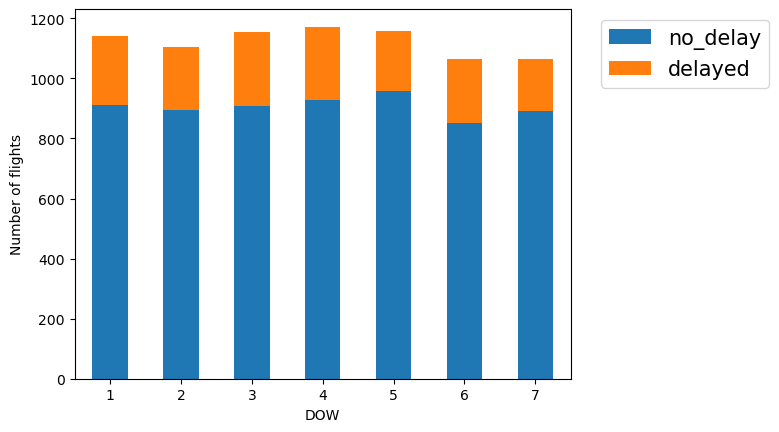

In [140]:
pd.crosstab(train['DOW'],train['delaystatus']).plot.bar(stacked=True)
plt.ylabel('Number of flights')
plt.rcParams.update({'font.size': 15})
ax = plt.subplot(111)
ax.legend(['no_delay','delayed'],bbox_to_anchor=(1.04, 1))
plt.xticks(rotation = 0)
plt.show()

In [141]:
## By observing above barplot we can conclude that day of week doesnot have a major impact on the delaystatus 
## Day Of Week (DOW) doesnot create Bias on the target column and we can drop that column.


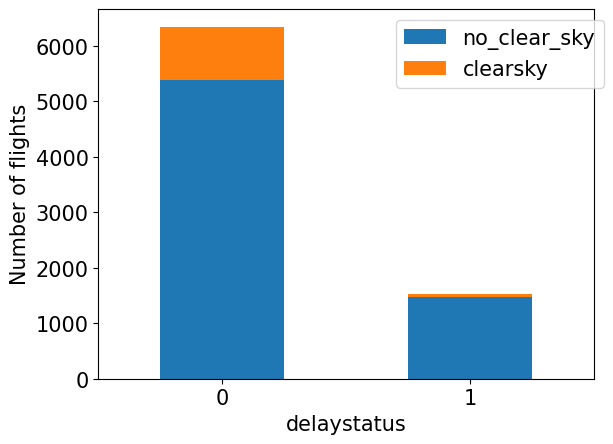

In [142]:
pd.crosstab(train['delaystatus'],train.O_clr).plot.bar(stacked=True)
plt.ylabel('Number of flights')
plt.rcParams.update({'font.size': 15})
ax = plt.subplot(111)
ax.legend(['no_clear_sky','clearsky'],bbox_to_anchor=(1.04, 1))
plt.xticks(rotation = 0)
plt.show()

In [143]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

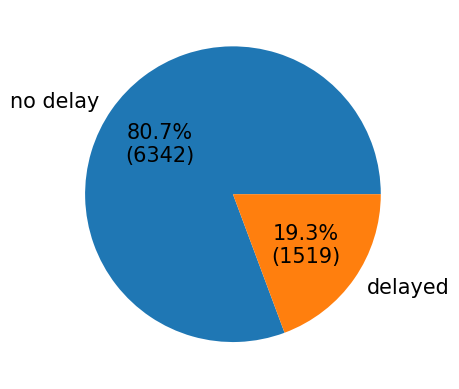

In [144]:
s = actarr['delaystatus'].value_counts()
plt.pie(s,labels = ["no delay", "delayed"], autopct=autopct_format(s))
plt.rcParams.update({'font.size': 15})
plt.show()

In [145]:
## By observing the pie chart we can conclude that the dataset is biased towards the No Delay status (0)

## majority class - No Delay (80.7%)
## minority class - Delayed (19.3%)


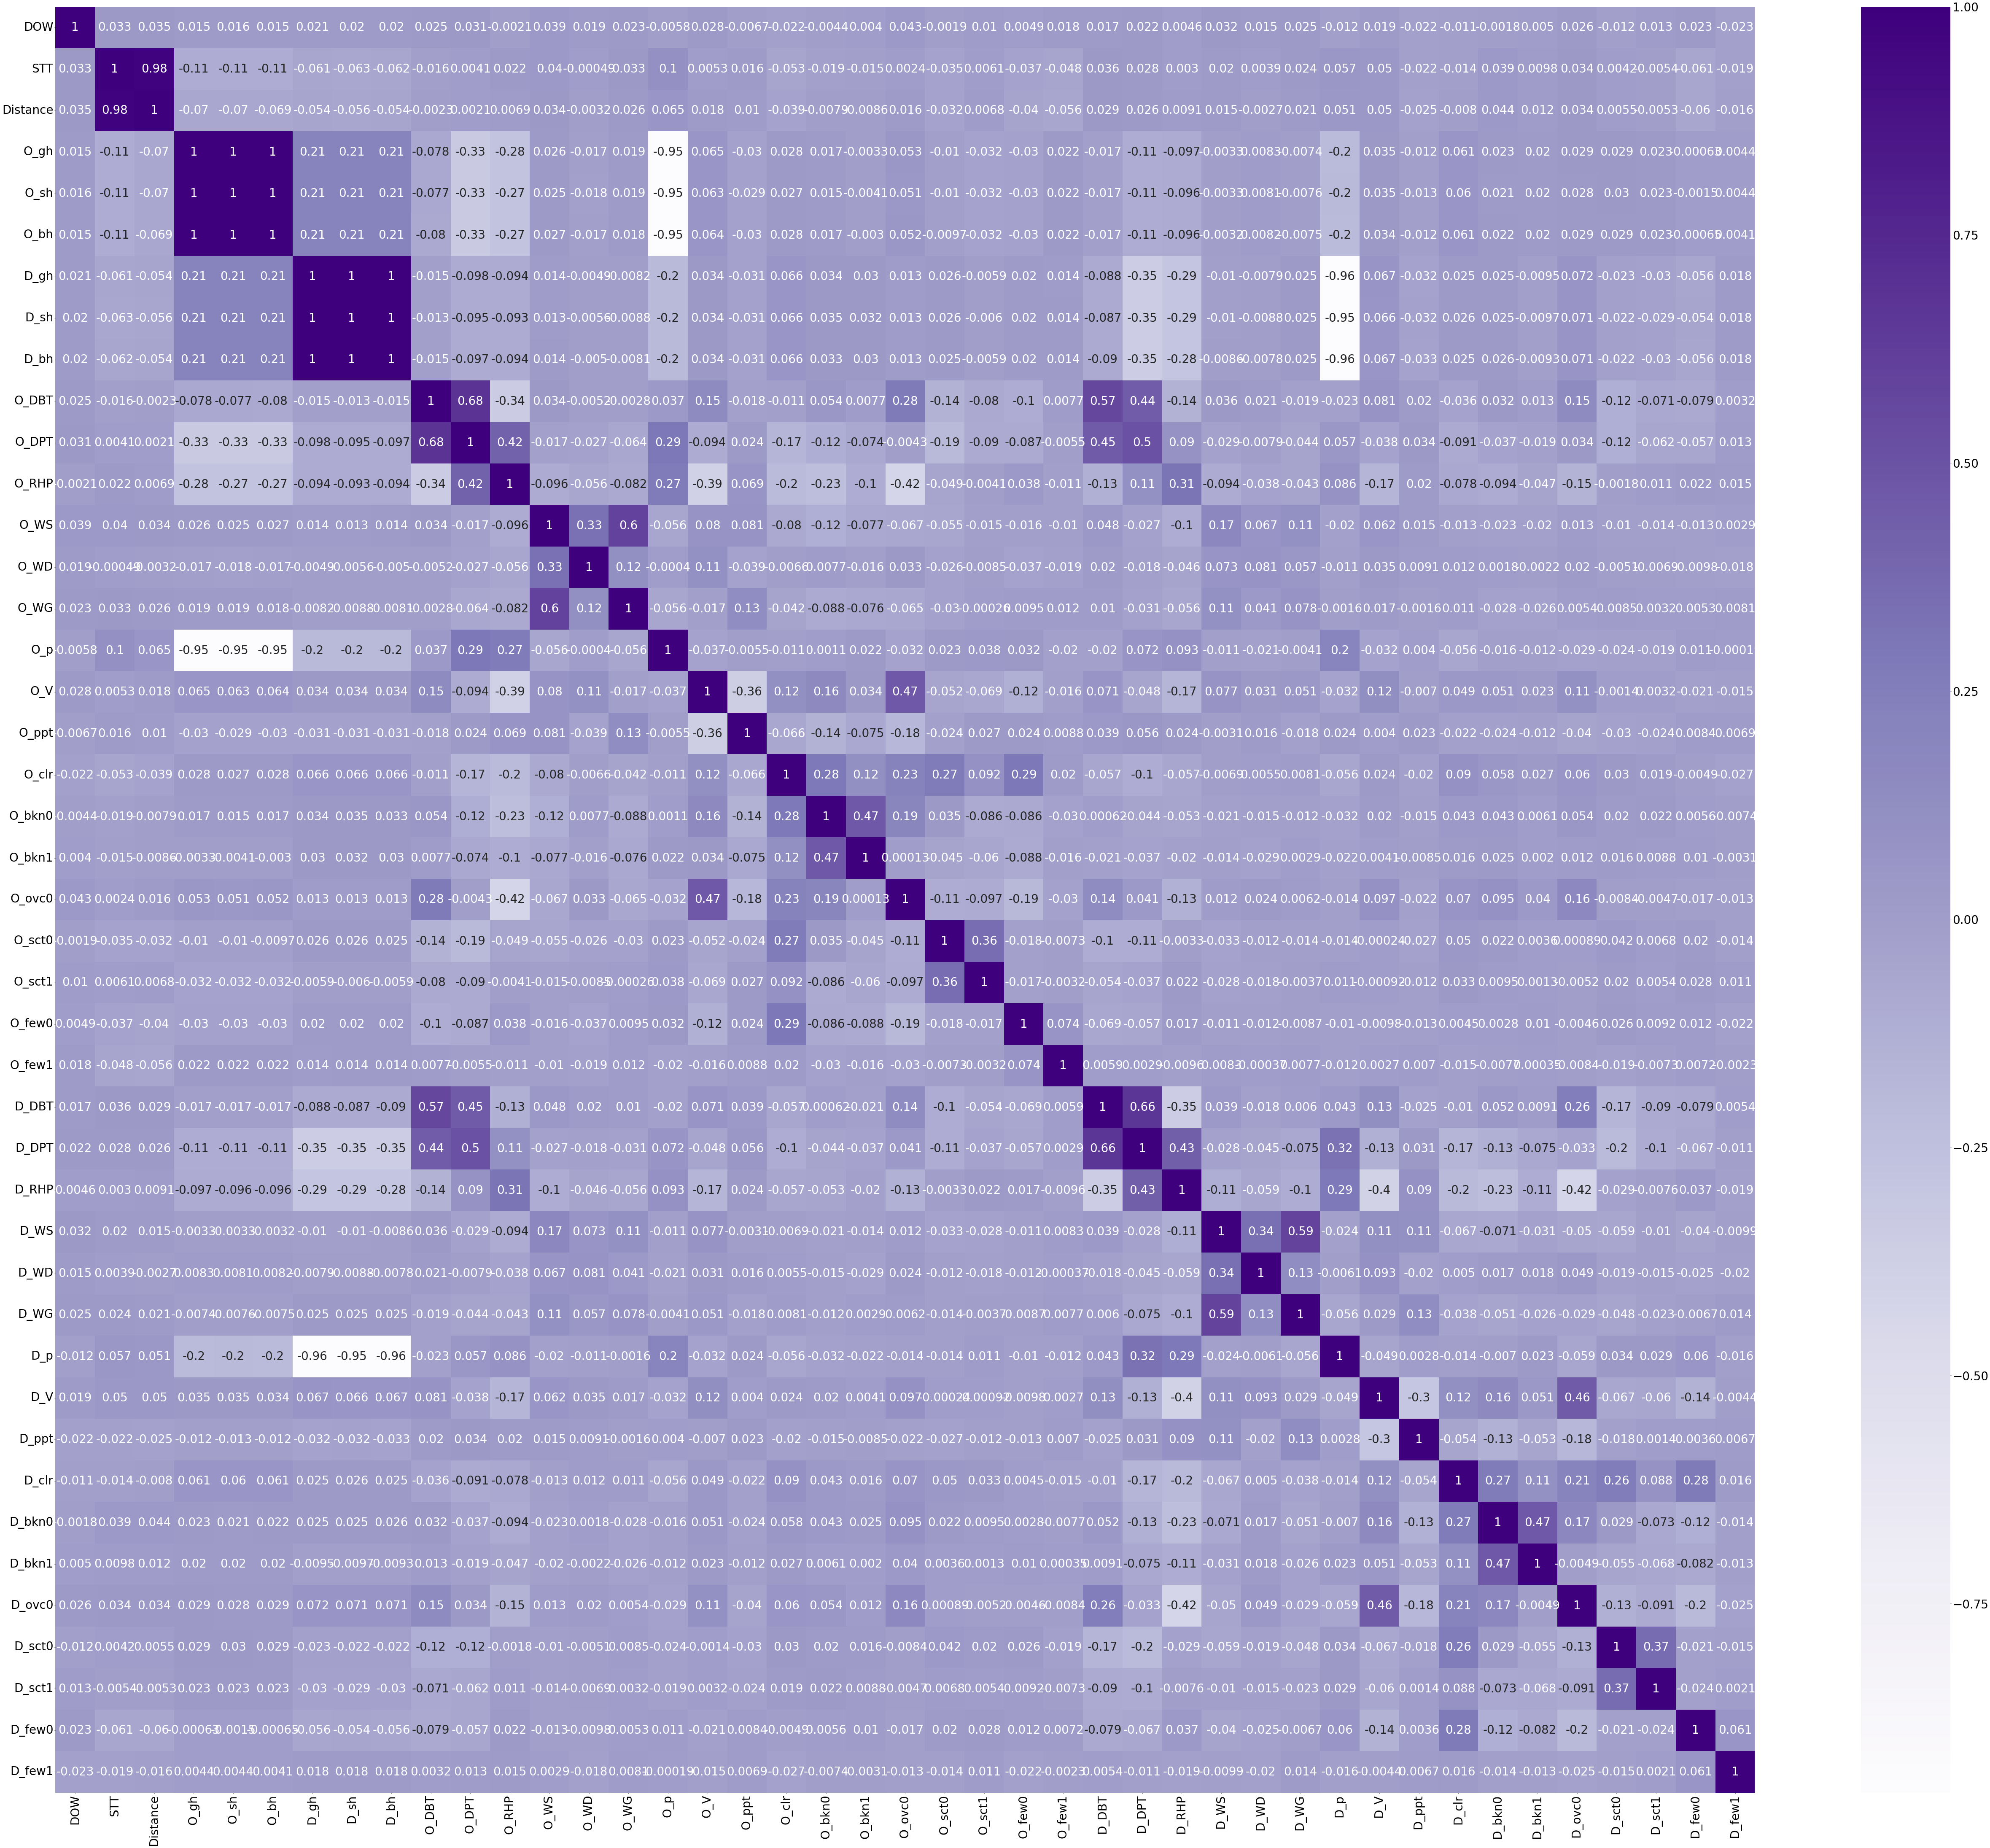

In [146]:
plt.rcParams.update({'font.size': 40})
target = 'delaystatus'
fig, ax = plt.subplots(figsize=(130, 110), dpi=50)
corr = pd.concat([train.drop(target,axis=1), train[target]],axis=1).corr()
ax = sns.heatmap(corr, annot=True, cmap='Purples')
plt.show()

In [147]:
## since there is high mutual correlation between ground height,station height and barometer height
## we can drop those columns

## we can see the corelation between distance and travel time, so we can drop any one of the column

In [148]:
train.drop(['STT','O_gh','O_sh','O_bh','D_gh','D_sh','D_bh','DOW'],axis = 1, inplace = True)

In [149]:
test.drop(['STT','O_gh','O_sh','O_bh','D_gh','D_sh','D_bh','DOW'],axis = 1, inplace = True)

## FEATURE SCALING

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
import warnings

In [151]:
X = train.drop('delaystatus', axis=1).copy()
Y = train['delaystatus'].copy()
Q = test.copy()

In [152]:
Y=Y.astype('int')

In [153]:
stdscale = StandardScaler()
  
# standardization for train
scaled_train = stdscale.fit_transform(X) 
scaled_train = pd.DataFrame(scaled_train, columns=X.columns,index=X.index)
scaled_train.head()

# standardization for test
scaled_test = stdscale.fit_transform(Q) 
scaled_test = pd.DataFrame(scaled_test, columns=Q.columns,index=Q.index)
scaled_test.head()

,Distance,O_DBT,O_DPT,O_RHP,O_WS,O_WD,O_WG,O_p,O_V,O_ppt,O_clr,O_bkn0,O_bkn1,O_ovc0,O_sct0,O_sct1,O_few0,O_few1,D_DBT,D_DPT,D_RHP,D_WS,D_WD,D_WG,D_p,D_V,D_ppt,D_clr,D_bkn0,D_bkn1,D_ovc0,D_sct0,D_sct1,D_few0,D_few1
0,-0.285030,1.077464,-2.125948,-2.501673,-0.265428,0.641989,1.630110,-4.014735,0.513640,-0.177617,-0.403157,0.708054,0.306931,0.552337,-0.95047,0.238151,-1.136050,0.043564,1.155798,0.526314,-1.012919,0.762282,-0.007029,-0.392726,-0.387827,-0.377518,-0.140149,-0.417849,0.669274,0.283795,0.506359,0.681980,0.237437,-1.229071,0.025124
1,-0.924219,0.472103,0.298151,-0.488385,-0.675691,-1.038030,-0.389408,0.803576,0.513640,-0.177617,-0.403157,-1.078728,0.306931,-0.253326,0.69083,0.238151,0.771713,0.043564,-0.038926,-1.197828,-1.631180,0.972369,1.414740,2.309001,0.936160,0.483232,-0.140149,-0.417849,0.669274,0.283795,0.506359,0.681980,0.237437,0.088543,0.025124
2,-0.997972,0.417070,-0.209219,-1.063610,-0.060297,0.465145,-0.389408,0.613946,0.513640,-0.177617,2.480424,0.708054,0.306931,0.552337,0.69083,0.238151,0.771713,0.043564,0.449825,0.693166,0.223603,-0.498239,-1.517658,-0.392726,0.044848,0.483232,-0.140149,-0.417849,0.669274,0.283795,0.506359,0.681980,0.237437,-1.478349,0.025124
3,-0.476031,-0.903718,-1.223958,-0.823933,0.349966,1.614632,-0.389408,0.975966,0.513640,-0.177617,2.480424,0.708054,0.306931,0.552337,0.69083,0.238151,0.771713,0.043564,-1.939622,-1.754003,-0.061748,0.132021,0.259553,-0.392726,0.261186,0.483232,-0.140149,-0.417849,-0.131666,0.283795,0.506359,-1.328772,0.237437,0.800767,0.025124
4,-1.156823,-0.628554,0.185402,1.524904,-1.085954,0.199879,-0.389408,0.544990,-2.193982,-0.177617,-0.403157,0.708054,0.306931,-2.227200,0.69083,0.238151,0.771713,0.043564,-0.310454,0.470696,1.412567,-1.128500,-0.629053,-0.392726,0.390989,-2.959768,-0.140149,-0.417849,0.669274,0.283795,-2.370256,0.681980,0.237437,0.800767,0.025124


In [154]:
scaled_train.head()

,Distance,O_DBT,O_DPT,O_RHP,O_WS,O_WD,O_WG,O_p,O_V,O_ppt,O_clr,O_bkn0,O_bkn1,O_ovc0,O_sct0,O_sct1,O_few0,O_few1,D_DBT,D_DPT,D_RHP,D_WS,D_WD,D_WG,D_p,D_V,D_ppt,D_clr,D_bkn0,D_bkn1,D_ovc0,D_sct0,D_sct1,D_few0,D_few1
0,-0.345896,-0.454590,-0.745346,-0.685660,-0.053144,-1.172463,-0.378285,0.965733,0.516654,-0.172002,-0.386571,0.732812,0.311203,0.582053,0.706955,0.239056,0.038974,0.051193,-0.424331,-0.636313,-0.571956,0.166944,0.060814,-0.372119,0.313872,0.500822,-0.149417,2.720019,0.724119,0.301547,0.561204,0.708537,0.239249,0.763166,0.044548
1,-0.363118,-0.998220,-0.131181,1.343388,-0.260453,-0.452174,-0.378285,0.025481,-1.048404,-0.060893,-0.386571,0.732812,0.311203,-1.938656,0.706955,0.239056,0.748607,0.051193,-0.424331,0.112933,0.645078,-0.257112,-0.119947,-0.372119,-0.090179,-0.317817,-0.013831,-0.367644,-1.653911,0.301547,-1.379308,0.708537,0.239249,-1.545163,0.044548
2,-0.990754,0.292900,0.278263,-0.240259,-0.467763,0.448187,-0.378285,0.538346,0.125389,-0.172002,2.586848,0.732812,0.311203,0.582053,0.706955,0.239056,0.748607,0.051193,1.817272,-1.794237,-2.616573,0.803027,0.603097,-0.372119,-1.344420,0.500822,-0.149417,2.720019,0.724119,0.301547,0.561204,0.708537,0.239249,0.763166,0.044548
3,-0.451140,1.584021,1.097150,-0.735149,-0.053144,1.708693,-0.378285,0.093863,0.516654,-0.172002,-0.386571,0.732812,0.311203,0.582053,0.706955,0.239056,-1.451255,0.051193,1.477635,1.611423,0.060902,0.166944,0.964619,-0.372119,0.768429,0.500822,-0.149417,-0.367644,0.724119,0.301547,0.561204,-0.055897,0.239249,0.763166,0.044548
4,-0.784093,-0.182776,0.346503,0.700032,-0.675073,-0.272102,-0.378285,-0.111283,0.125389,-0.172002,-0.386571,-1.452012,-1.180104,0.582053,0.706955,0.239056,0.748607,0.051193,0.119088,0.249159,-0.036461,-0.893196,0.331956,-0.372119,0.288619,0.091503,-0.149417,-0.367644,0.724119,0.301547,0.561204,-0.438113,0.239249,-1.154522,0.044548


###  FEATURE SELECTION

from IPython.display import Javascript
display(Javascript('IPython.notebook.execute_cells_above()'))

In [155]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [156]:
mutual_info = mutual_info_classif(scaled_train,Y)

In [157]:
mi = pd.Series(list(mutual_info))
mi.index = scaled_train.columns
mi.sort_values(ascending = False)

O_V         0.059677
O_RHP       0.056755
D_V         0.041712
O_ppt       0.040453
O_ovc0      0.037419
O_p         0.036672
D_RHP       0.036113
D_ovc0      0.029819
O_bkn0      0.028039
O_DBT       0.024180
O_sct0      0.020491
O_DPT       0.020208
D_DPT       0.015097
D_bkn0      0.015002
Distance    0.014158
O_clr       0.013730
O_few0      0.012724
D_few0      0.012515
D_ppt       0.012157
D_sct0      0.012049
D_p         0.011944
D_DBT       0.010492
O_WD        0.008080
D_clr       0.007708
O_WS        0.006671
D_sct1      0.004987
O_few1      0.002887
O_WG        0.002365
D_bkn1      0.001885
D_WS        0.001577
D_WD        0.001205
O_sct1      0.000354
D_WG        0.000000
O_bkn1      0.000000
D_few1      0.000000
dtype: float64

<AxesSubplot:>

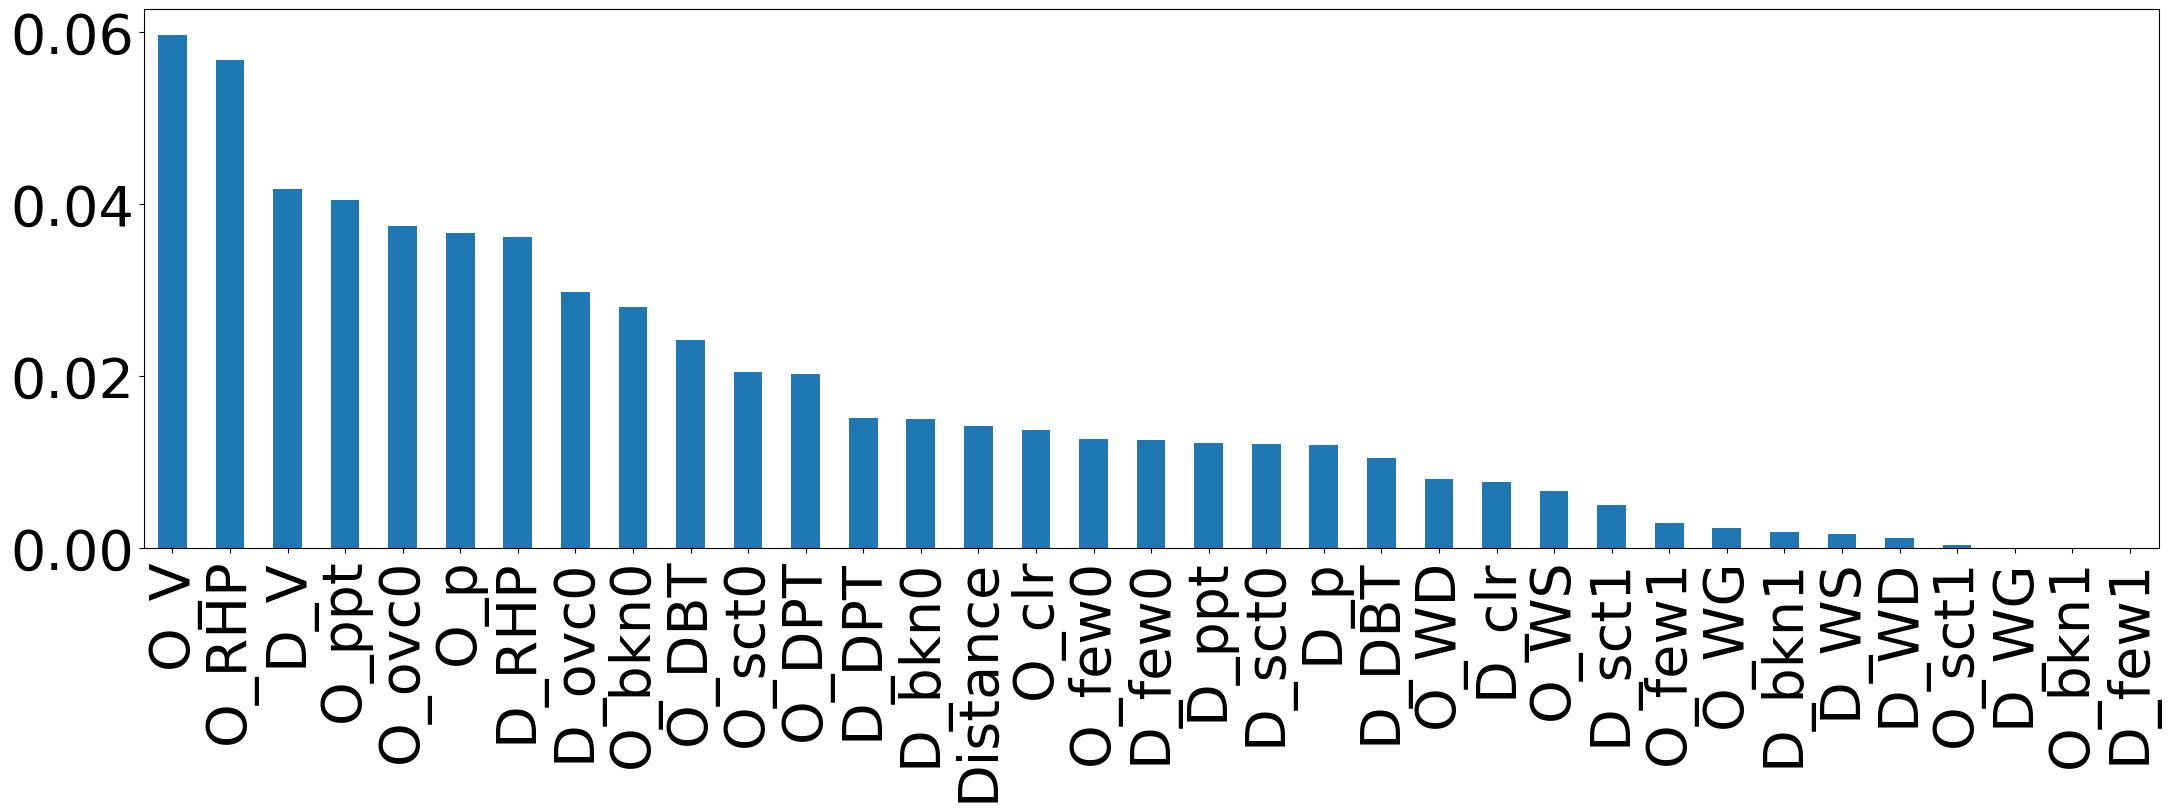

In [158]:
mi.sort_values(ascending = False).plot.bar(figsize =(26,7) )

In [159]:
tt_cols = SelectKBest(mutual_info_classif, k=15)
tr = tt_cols.fit_transform(scaled_train,Y)

In [160]:
cols = tt_cols.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['Distance',
 'O_DBT',
 'O_DPT',
 'O_RHP',
 'O_p',
 'O_V',
 'O_ppt',
 'O_bkn0',
 'O_ovc0',
 'O_sct0',
 'O_few0',
 'D_RHP',
 'D_V',
 'D_bkn0',
 'D_ovc0']

In [161]:
scaled_test.head()

,Distance,O_DBT,O_DPT,O_RHP,O_WS,O_WD,O_WG,O_p,O_V,O_ppt,O_clr,O_bkn0,O_bkn1,O_ovc0,O_sct0,O_sct1,O_few0,O_few1,D_DBT,D_DPT,D_RHP,D_WS,D_WD,D_WG,D_p,D_V,D_ppt,D_clr,D_bkn0,D_bkn1,D_ovc0,D_sct0,D_sct1,D_few0,D_few1
0,-0.285030,1.077464,-2.125948,-2.501673,-0.265428,0.641989,1.630110,-4.014735,0.513640,-0.177617,-0.403157,0.708054,0.306931,0.552337,-0.95047,0.238151,-1.136050,0.043564,1.155798,0.526314,-1.012919,0.762282,-0.007029,-0.392726,-0.387827,-0.377518,-0.140149,-0.417849,0.669274,0.283795,0.506359,0.681980,0.237437,-1.229071,0.025124
1,-0.924219,0.472103,0.298151,-0.488385,-0.675691,-1.038030,-0.389408,0.803576,0.513640,-0.177617,-0.403157,-1.078728,0.306931,-0.253326,0.69083,0.238151,0.771713,0.043564,-0.038926,-1.197828,-1.631180,0.972369,1.414740,2.309001,0.936160,0.483232,-0.140149,-0.417849,0.669274,0.283795,0.506359,0.681980,0.237437,0.088543,0.025124
2,-0.997972,0.417070,-0.209219,-1.063610,-0.060297,0.465145,-0.389408,0.613946,0.513640,-0.177617,2.480424,0.708054,0.306931,0.552337,0.69083,0.238151,0.771713,0.043564,0.449825,0.693166,0.223603,-0.498239,-1.517658,-0.392726,0.044848,0.483232,-0.140149,-0.417849,0.669274,0.283795,0.506359,0.681980,0.237437,-1.478349,0.025124
3,-0.476031,-0.903718,-1.223958,-0.823933,0.349966,1.614632,-0.389408,0.975966,0.513640,-0.177617,2.480424,0.708054,0.306931,0.552337,0.69083,0.238151,0.771713,0.043564,-1.939622,-1.754003,-0.061748,0.132021,0.259553,-0.392726,0.261186,0.483232,-0.140149,-0.417849,-0.131666,0.283795,0.506359,-1.328772,0.237437,0.800767,0.025124
4,-1.156823,-0.628554,0.185402,1.524904,-1.085954,0.199879,-0.389408,0.544990,-2.193982,-0.177617,-0.403157,0.708054,0.306931,-2.227200,0.69083,0.238151,0.771713,0.043564,-0.310454,0.470696,1.412567,-1.128500,-0.629053,-0.392726,0.390989,-2.959768,-0.140149,-0.417849,0.669274,0.283795,-2.370256,0.681980,0.237437,0.800767,0.025124


In [162]:
tt = scaled_test[['Distance','O_DBT', 'O_RHP', 'O_p', 'O_V', 
                  'O_ppt', 'O_clr', 'O_bkn0', 'O_ovc0', 'O_sct0',
                  'O_few0', 'D_RHP', 'D_V', 'D_bkn0', 'D_ovc0']]

In [163]:
trn = pd.DataFrame(tr,columns =['Distance','O_DBT','O_RHP','O_p', 'O_V',
                                'O_ppt', 'O_clr', 'O_bkn0', 'O_ovc0', 'O_sct0',
                                'O_few0', 'D_RHP', 'D_V', 'D_bkn0', 'D_ovc0'])

## MODEL BUILDING

In [164]:
X_train, X_test, y_train, y_test = train_test_split(trn,Y, 
                          random_state=42,
                          train_size=0.80, shuffle=True,stratify =Y )

In [165]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (6288, 15)
X_test shape:  (1573, 15)
y_train shape:  (6288,)
y_test shape:  (1573,)


In [166]:
from imblearn.under_sampling import TomekLinks

ros = TomekLinks(sampling_strategy='majority')

x_tl = X_train.copy()
y_tl = y_train.copy()
# fit predictor and target variable
for i in range (3):
    X_train, y_train = ros.fit_resample(x_tl,y_tl )

In [167]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (5973, 15)
X_test shape:  (1573, 15)
y_train shape:  (5973,)
y_test shape:  (1573,)


###  XGBoost


In [168]:
import xgboost as xgb

In [169]:
xgb_model = xgb.XGBClassifier(objective = 'binary:logistic',seed = 42)
xgb_model.fit(X_train,y_train,verbose = True, early_stopping_rounds = 10,
              eval_metric = 'aucpr', eval_set = [(X_test,y_test)])

[0]	validation_0-aucpr:0.46219
[1]	validation_0-aucpr:0.48227
[2]	validation_0-aucpr:0.49201
[3]	validation_0-aucpr:0.50861
[4]	validation_0-aucpr:0.51574
[5]	validation_0-aucpr:0.51857
[6]	validation_0-aucpr:0.51983
[7]	validation_0-aucpr:0.52007
[8]	validation_0-aucpr:0.52019
[9]	validation_0-aucpr:0.51873
[10]	validation_0-aucpr:0.52346
[11]	validation_0-aucpr:0.52577
[12]	validation_0-aucpr:0.52572
[13]	validation_0-aucpr:0.52778
[14]	validation_0-aucpr:0.52695
[15]	validation_0-aucpr:0.52679
[16]	validation_0-aucpr:0.52840
[17]	validation_0-aucpr:0.52836
[18]	validation_0-aucpr:0.52538
[19]	validation_0-aucpr:0.52111
[20]	validation_0-aucpr:0.51864
[21]	validation_0-aucpr:0.51629
[22]	validation_0-aucpr:0.51912
[23]	validation_0-aucpr:0.51874
[24]	validation_0-aucpr:0.51987
[25]	validation_0-aucpr:0.51943
[26]	validation_0-aucpr:0.52295


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [170]:
pred = xgb_model.predict(X_test)

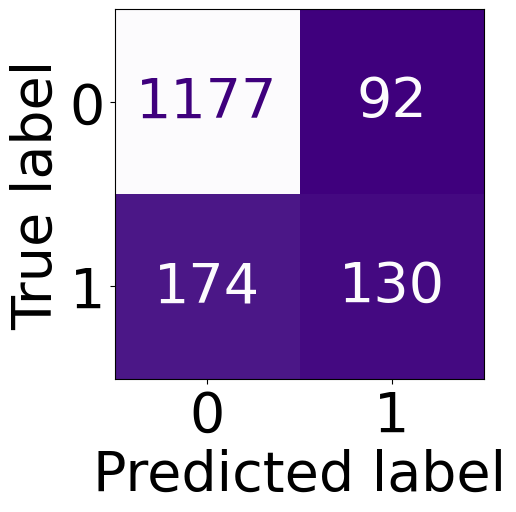

In [171]:
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, colorbar=False, cmap='Purples_r')
plt.grid(False)

In [172]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1269
           1       0.59      0.43      0.49       304

    accuracy                           0.83      1573
   macro avg       0.73      0.68      0.70      1573
weighted avg       0.82      0.83      0.82      1573



In [173]:
def metrics_calculator(y_test, pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, pred),
                                precision_score(y_test, pred, average='macro'),
                                recall_score(y_test, pred, average='macro'),
                                f1_score(y_test, pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])
    return result

In [174]:
result = metrics_calculator(y_test, pred, 'XGB')
result

,XGB
Accuracy,0.830896
Precision,0.728396
Recall,0.677567
F1-score,0.696385


In [175]:
predic = xgb_model.predict(X_train)

In [176]:
result = metrics_calculator(y_train, predic, 'XGB')
result

,XGB
Accuracy,0.912439
Precision,0.904474
Recall,0.813579
F1-score,0.848633


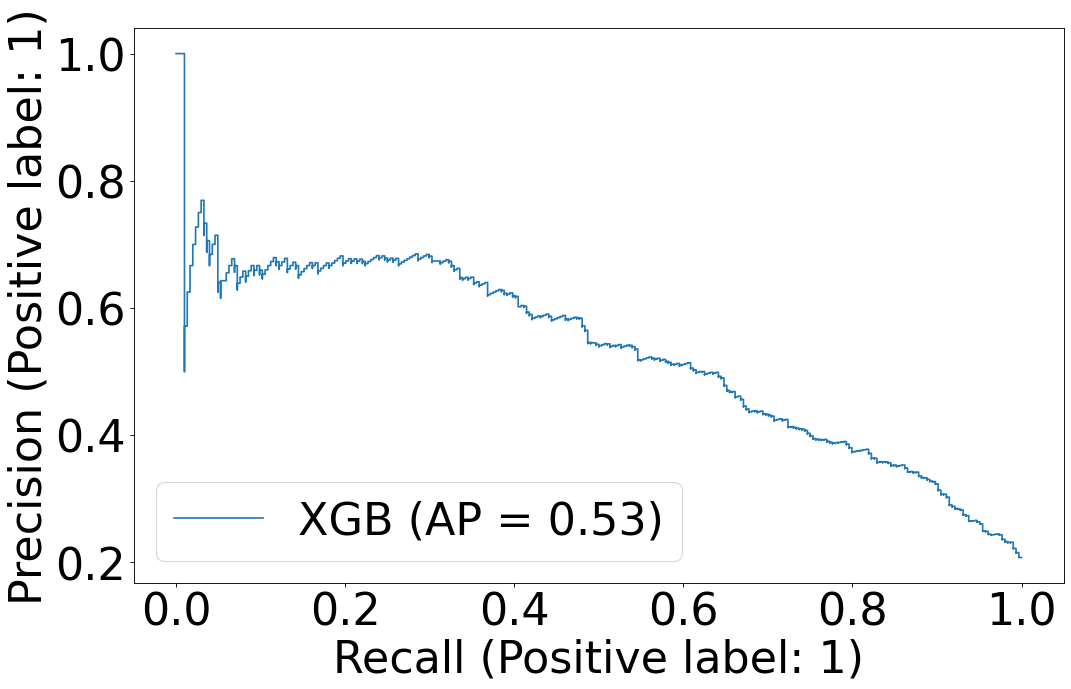

In [177]:
fig, ax = plt.subplots(figsize=(15, 9), dpi=80)
PrecisionRecallDisplay.from_estimator(xgb_model, X_test, y_test, ax=ax, name='XGB')
plt.show()

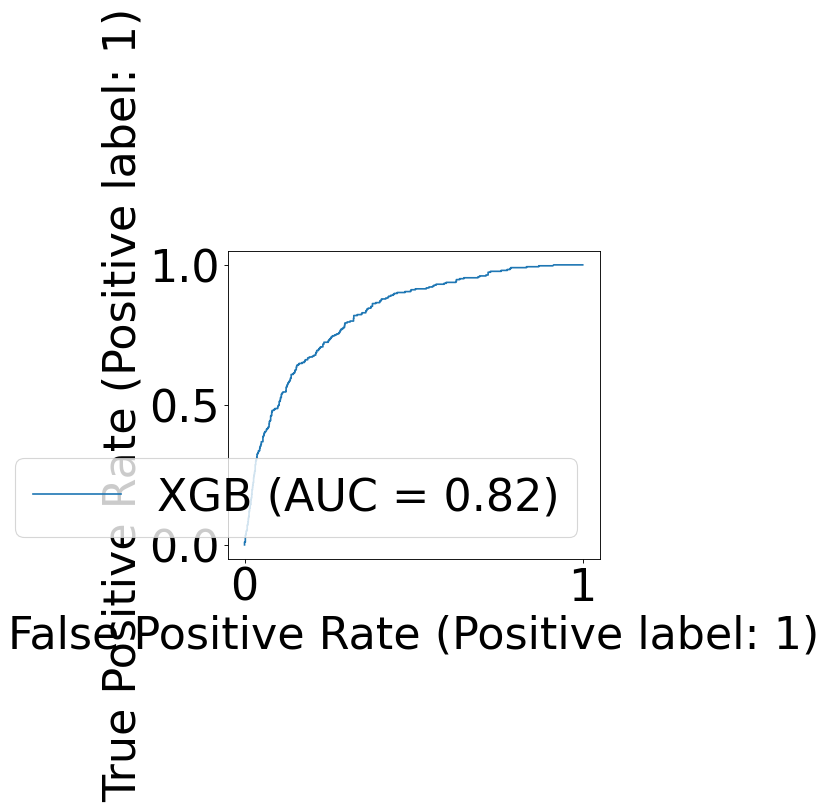

In [178]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test, ax=ax, name='XGB')
plt.show()

### HYPERPARAMETER TUNING

In [179]:
# Create the param grid
param_grid = { 'max_depth':[4,5,6,7],
              'learning_rate':[0.2,0.1,0.01,0.05],
              'gamma':[0,0.25,1.0,2.0],
              'reg_lamda':[0,1.0,10.0],
              'scale_pos_weight':[1,3,5]}


In [180]:
from sklearn.model_selection import GridSearchCV
cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=7)
xgb_Grid = GridSearchCV(estimator = xgb.XGBClassifier(objective = 'binary:logistic',
                                                      seed = 42,subsample = 0.9,
                                                      colsample_bytree = 0.5),
                        param_grid = param_grid, cv =cv, verbose=0, n_jobs = 10,
                       scoring = 'roc_auc')



In [181]:
xgb_Grid.fit(X_train, y_train,early_stopping_rounds = 10,
            eval_metric = 'aucpr',eval_set = [(X_test,y_test)],
            verbose = True)

[13:44:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "reg_lamda" } are not used.

[0]	validation_0-aucpr:0.43199
[1]	validation_0-aucpr:0.49932
[2]	validation_0-aucpr:0.51804
[3]	validation_0-aucpr:0.52314
[4]	validation_0-aucpr:0.52488
[5]	validation_0-aucpr:0.52891
[6]	validation_0-aucpr:0.53260
[7]	validation_0-aucpr:0.53480
[8]	validation_0-aucpr:0.53540
[9]	validation_0-aucpr:0.53471
[10]	validation_0-aucpr:0.53712
[11]	validation_0-aucpr:0.53588
[12]	validation_0-aucpr:0.53339
[13]	validation_0-aucpr:0.53763
[14]	validation_0-aucpr:0.53428
[15]	validation_0-aucpr:0.54014
[16]	validation_0-aucpr:0.53939
[17]	validation_0-aucpr:0.54086
[18]	validation_0-aucpr:0.53930
[19]	validation_0-aucpr:0.53814
[20]	validation_0-aucpr:0.53871
[21]	validation_0-aucpr:0.53953
[22]	validation_0-aucpr:0.53953
[23]	validation_0-aucpr:0.53841
[24]	validation_0-aucpr:0.53799
[25]	valida

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=7, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [182]:
print (f'Train Accuracy - : {xgb_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {xgb_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.912
Test Accuracy - : 0.831


In [183]:
xgb_Grid.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'reg_lamda': 0,
 'scale_pos_weight': 5}

In [184]:
predi = xgb_Grid.predict(X_test)

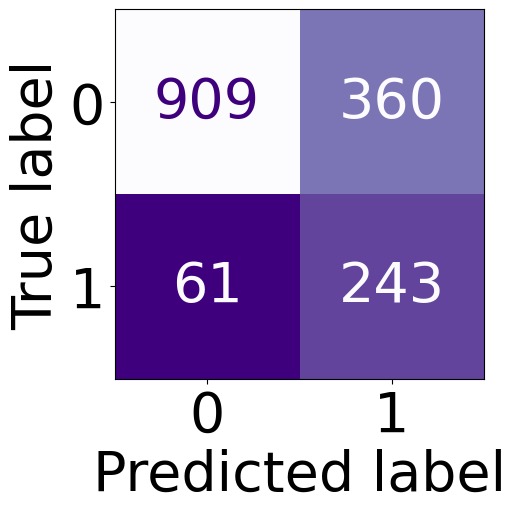

In [185]:
ConfusionMatrixDisplay.from_estimator(xgb_Grid, X_test, y_test, colorbar=False, cmap='Purples_r')
plt.grid(False)

In [186]:
result = metrics_calculator(y_test, predi, 'XGB')
result

,XGB
Accuracy,0.732359
Precision,0.670049
Recall,0.757827
F1-score,0.673901


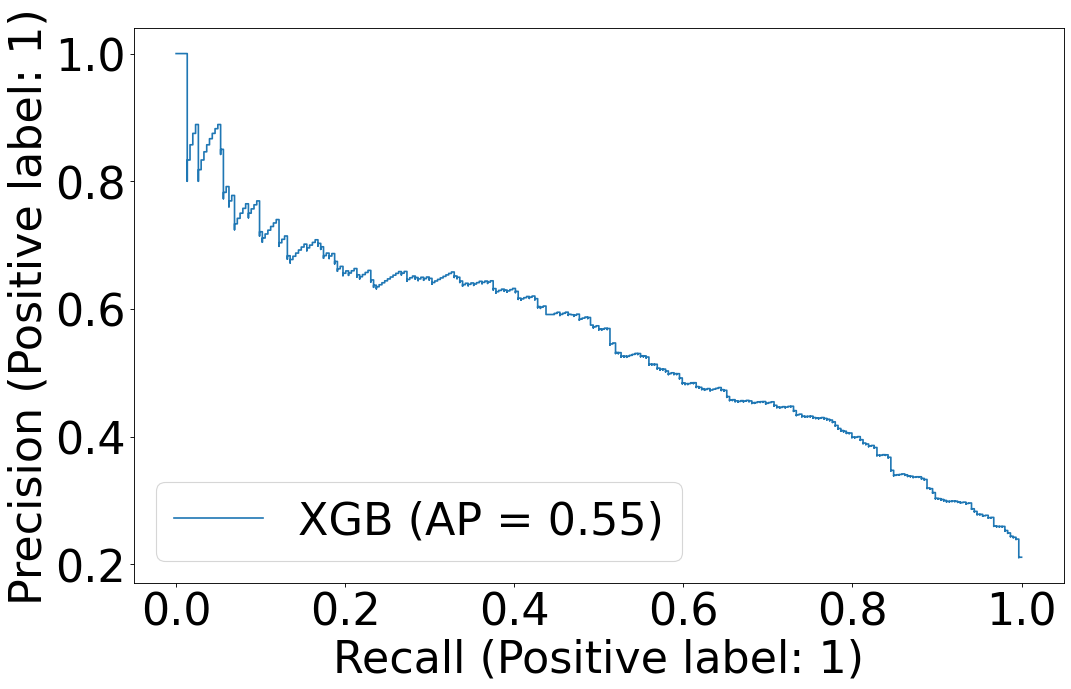

In [187]:
fig, ax = plt.subplots(figsize=(15, 9), dpi=80)
PrecisionRecallDisplay.from_estimator(xgb_Grid, X_test, y_test, ax=ax, name='XGB')
plt.show()

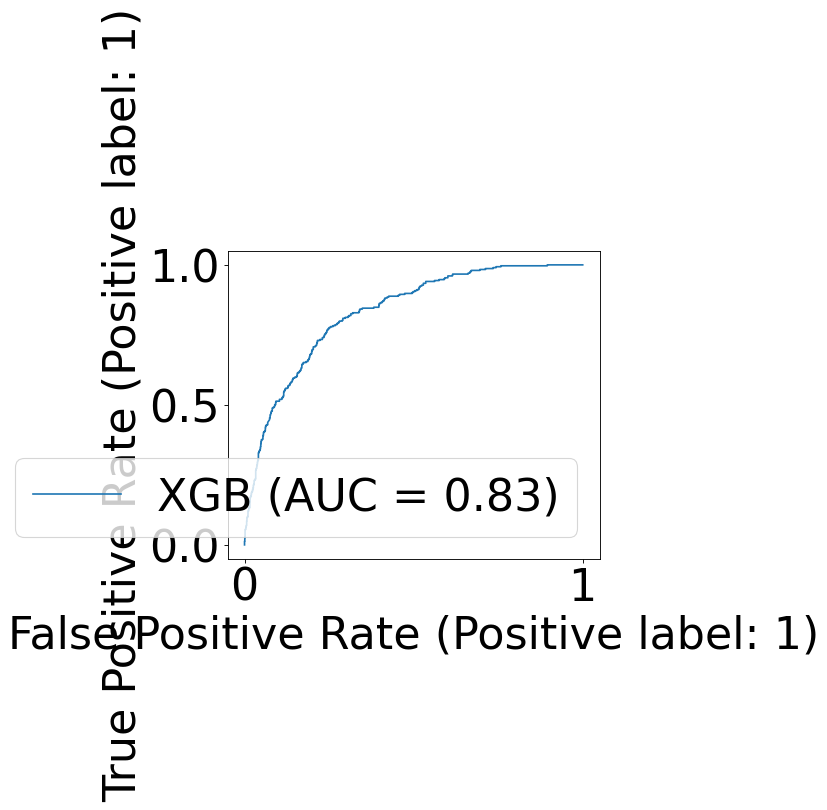

In [188]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
RocCurveDisplay.from_estimator(xgb_Grid, X_test, y_test, ax=ax, name='XGB')
plt.show()

# Pickle file

In [190]:
import pickle
pickle.dump(xgb_Grid,open("xgbmodel.pkl",'wb'))

# Submission

In [191]:
sample = pd.read_csv("samplesubmission.csv")

In [192]:
sample.shape,tt.shape

((6566, 2), (6566, 15))

In [193]:
delaystatus = xgb_Grid.predict(tt)
delay = pd.DataFrame(delaystatus)
sample.FlightDelayStatus = delay

In [194]:
sample['FlightDelayStatus'] = sample['FlightDelayStatus'].replace(0, 2)

In [195]:
sample.FlightDelayStatus.value_counts()

2    3787
1    2779
Name: FlightDelayStatus, dtype: int64

In [ ]:
## sample.to_csv("sub_v83.csv",index = False)